# Reddit Text Analysis

# <center>Table of Contents
    
    
- **Libraries**


- **Part1: Data Loading**

    - 1.1 Load the provided dataset (reddit_data.json)
    - 1.2 Generate unique subset of the data
    
    
- **Part2: Exploratory Data Analysis**

    - *2.1 Subreddit Distributions*
    - *2.2 id*
    - *2.3 authors*
    - *2.4 created_utc*
    - *2.5 num_comments and score*
        - 2.5.1 Find Correlation
        - 2.5.2 Distribution of num_comments
        - 2.5.3 Distribution of score
    - *2.6 Topic mentioned in URLs*
        - 2.6.1 Distributions
        - 2.6.2 Top Words in URLs
    - *2.7 Common Words in Titles*
    - *2.8 Common Noun Phrases in Titles*
    - *2.9 selftext*


- **Part3: Classifications on Subreddits**

    - *3.1 Data Preparation*
        - 3.1.1 Clean Texts
        - 3.1.2 Label Encoding
        - 3.1.3 Drop Useless Columns
        
    - *3.2 Feature Engineering*
        - 3.2.1 Binary Features
        - 3.2.2 Word Frequency Features
        - 3.2.3 TF-IDF Features
        
    - *3.3 Model Implementations*
        - Justification on Metrics and Evaluation Methods
        - Hyperparameter Tuning
        - Detailed Model Implementation
            - 3.3.1 Logistic Regression
            - 3.3.2 Multinomial Naive Bayes
            - 3.3.3 Support Vector Machine
            - 3.3.4 Random Forest
        - Results of Models
        - Performance of Models
        - Comparisons of Feature Engineering Methods
            
    - *3.4 Check Overfitting on Best Model*
    
    - *3.5 Best Model on Different Feature Sets*
        - 3.5.1 title_cleaned Feature Only
            - 3.5.1.1 Best Model with Binary Features
            - 3.5.1.2 Best Model with Word Frequency Features
            - 3.5.1.3 Best Model with TF-IDF Features
        - 3.5.2 All Feature include 'time' and 'score'
            - 3.5.2.1 Best Model with Binary Features
            - 3.5.2.2 Best Model with Word Frequency Features
            - 3.5.2.3 Best Model with TF-IDF Features
            
            
- **Part4: Sentiment Analysis**

    - *4.1 Calculating Vader Sentiment Scores for Titles*
    
    - *4.2 Define a Threshold by Distribution*
    
    - *4.3 Assign Sentiment Labels and Distribution of Sentiments*
    
    - *4.4 Top Words by Word Frequency*
    
    - *4.5 Top Words by Pointwise Mutual Information*
        - 4.5.1 Justifications
        - 4.5.2 Single Words by PMI
        - 4.5.3 Noun Phrases by PMI

# Libraries

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from tqdm import tqdm
from datetime import datetime
import math

import nltk
import re
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("averaged_perceptron_tagger")
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#model implementation
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /Users/barry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/barry/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/barry/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# <center>Part 1: Data Loading<center>

## 1.1 Load the provided dataset (reddit_data.json)

In [0]:
data_all = pd.read_json("reddit_data.zip", orient='records', lines=True)
data_all = data_all[["id", "author", "created_utc", "subreddit", "title", "num_comments", "score", "selftext", "url"]]

In [0]:
data_all.head(3)

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
0,abcupx,WithGravy,1546300839,gaming,What are some game games to enjoy on a low-end...,31,3,Got a new laptop and want to enjoy some games ...,https://www.reddit.com/r/gaming/comments/abcup...
1,abcuz2,mikebeingfrank,1546300881,pics,"In 1964, an average wage worker had to clock 8...",4,5,,https://i.redd.it/j6rqqthwcp721.jpg
2,abcv1a,[deleted],1546300892,worldnews,"India: Chinese woman, 25, on solo trip to Khaj...",13,23,,https://timesofindia.indiatimes.com/city/agra/...


## 1.2	Generate unique subset of the data

**Make sure you update unique_string with your email address**

In [0]:
# DO NOT CHANGE THE FUNCTION BELOW
def getMySubreddits(data, my_str):
    assert my_str != "", "You must fill in your unique string"
    import random
    subreddits = sorted(data["subreddit"].unique().tolist())
    rng = random.Random(my_str)
    return rng.sample(subreddits, 4)

In [0]:
# Fill in your UofT email in the variable unique_string below
unique_string = "barry.xu@mail.utoronto.ca" 
my_subreddits = getMySubreddits(data_all, unique_string)
print("My subreddits:", my_subreddits)

My subreddits: ['technology', 'movies', 'news', 'leagueoflegends']


In [0]:
data = data_all[data_all["subreddit"].isin(my_subreddits)]

In [0]:
data.head(3)

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
15,abcvwo,HenryHiggensBand,1546301050,movies,I’ve seen several movies/shows over the past f...,6,0,Ones I’ve noticed as being oddly similar that ...,https://www.reddit.com/r/movies/comments/abcvw...
25,abcwz4,polyhedron_servent,1546301243,technology,bots are taking over,0,1,,https://emojipedia-us.s3.dualstack.us-west-1.a...
40,abcxql,[deleted],1546301367,technology,“Let’s just say every last molecule of you at ...,3,0,[deleted],https://brainworldmagazine.com/transposed-mind...


# <center>Part 2: Exploratory Data Analysis<center> 

##  2.1 Subreddit Distributions

&emsp;&emsp;&emsp;As we can see from the distributions of subreddits, topic 'technology' appeared the most frequently in the dataset,'news' was the second and both 'movies' and 'leagueoflegends' had very similar numbers of postings. We can say this dataset was imbalanced for classfication on the topics since the predictions will be biased to the majority of the class and perform worse on the minority. 


&emsp;&emsp;&emsp;It implied that we should split the training and test dataset more evenly when we are doing the classifications, i.e. includes 'stratify' when we split the dataset for training based on the distribution of topics to get a meaningful accuracy. Furthermore, accuracy as the performance metric may have a misleading evaluation result, therefore, I need to think about other metrics such as precisions and F1 scores.

In [0]:
topic_num = dict((topic,0) for topic in my_subreddits)
for topic in topic_num:
    num = len(data[data.subreddit==topic])
    topic_num[topic] = num

In [0]:
topic_num

{'technology': 11123, 'movies': 2546, 'news': 4775, 'leagueoflegends': 2558}

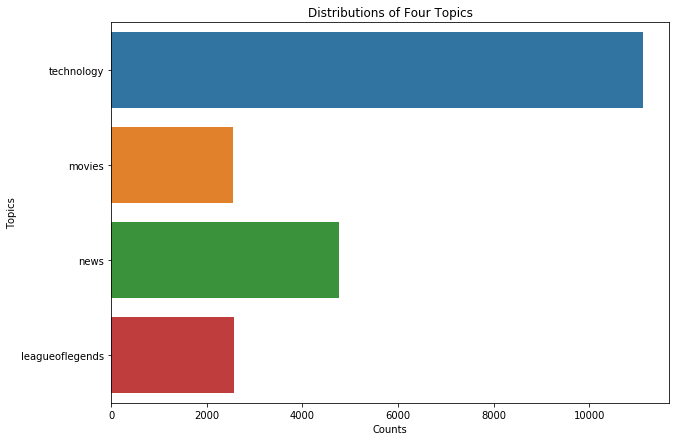

In [0]:
plt.figure(figsize=(10,7))
sns.barplot(x=list(topic_num.values()),y=list(topic_num.keys()))
plt.title('Distributions of Four Topics')
plt.ylabel('Topics')
plt.xlabel('Counts')
plt.show()

## 2.2 ID

&emsp;&emsp;&emsp;There is an ID for every post to represent the uniqueness. For classifications problem of subreddits in part 3, IDs will not provide useful information to it since it won't provide distinct information for the subreddits, therefore, IDs could be dropped in the data preparation section.

In [0]:
len(data)

21002

In [0]:
len(data.id.unique())

21002

## 2.3 Authors

&emsp;&emsp;&emsp;Authors could be strong indicators to show whether this posting is in a certain topic. Some authors posted a lot posts under the same topic so that they could be great indicators of that topic. I can add the user names as text and combine them with other main texts as features to predict the topic.


&emsp;&emsp;&emsp;By inspecting this column, I found there were a lot of authors called '[deleted]' and a bar plot below showed the proportions of them in each topic. 'movie' and 'leagueoflegends' are two topics with higher proportions of '[deleted]', this is not good since these two topics are already have the least amount of posts in the dataset as discusses in 2.1, with less authors' information may make the predictions on these classes even worse.


&emsp;&emsp;&emsp;From the four horizontal bar plots of top 20 most common authors in each topic, we can see they all have distinct user names in different topics, therefore, I don't need to worry about the situation where same authors will publish many postings under two different topics. Therefore, the user names under each topic will be added to their corresponding postings as a unique feature for classifications.

In [0]:
def topk_author(df, topic, k):
    
    counter = Counter()
    df_temp1 = df[df.subreddit==topic]
    df_temp2 = df_temp1[df_temp1 != '[deleted]']
    counter.update(df_temp2.author)
    topk = counter.most_common(k)
    
    return topk

In [0]:
common_authors = dict((topic,0) for topic in my_subreddits)
for topic in common_authors:
    author_topk = topk_author(data, topic, 20)
    common_authors[topic] = author_topk

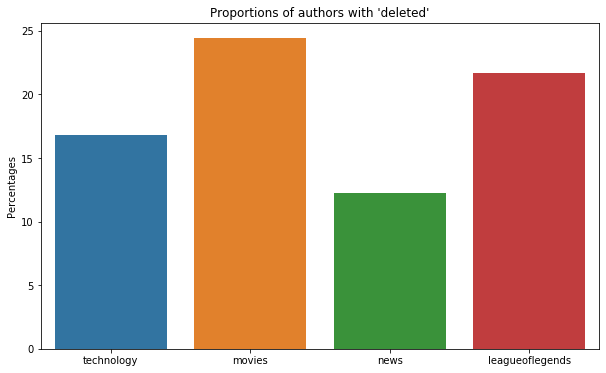

In [0]:
deleted = []
for topic in my_subreddits:
    df_temp1 = data[data.subreddit==topic]
    topic_len = len(df_temp1)
    df_temp2 = df_temp1[df_temp1.author=='[deleted]']
    deleted_len = len(df_temp2)
    perct = round(deleted_len/topic_len*100,2)
    deleted.append(perct)
    
plt.figure(figsize=(10,6))
sns.barplot(x=my_subreddits,y=deleted)
plt.title('Proportions of authors with \'deleted\'')
plt.ylabel('Percentages')
plt.show()

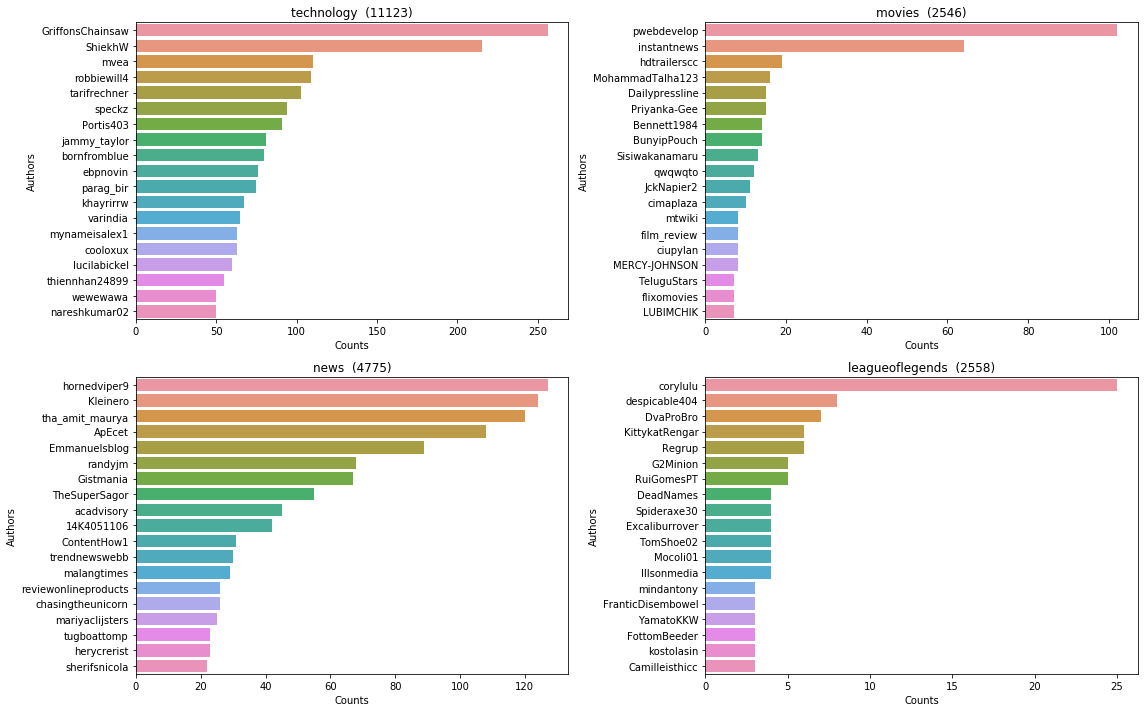

In [0]:
plt.figure(figsize=(16,10))
for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    author_counts = common_authors[topic]
    topic_counts = topic_num[topic]
    x,y = map(list,zip(*author_counts))
    plt.subplot(2,2,i+1)
    sns.barplot(x=y,y=x)
    plt.title('{}  ({})'.format(topic,topic_counts))
    plt.ylabel('Authors')
    plt.xlabel('Counts')
    
plt.tight_layout()
plt.show()

## 2.4 created_utc

&emsp;&emsp;&emsp;As shown in the four bar plots below, the y-axis represents the number of postings in each day. For each topic, the patterns are clearly different, for example, topic 'technology' has a very clear pattern which has peaks of 5-day period, I also checked the calendar in January 2019 and found that the peaks were at weekdays and number of postings went down on weekends; 'movies' seems to have a relatively flat distributions of postings in this month and 'news' has the most fluctuating trend; 'leagueoflegends' has distributions in between topics 'movies' and 'news'.


&emsp;&emsp;&emsp;Therefore, everyday's postings on these three topics have distinct pattern and will help the models on classfications. I could label encoding these dates and used them as a feature for model implementation.

In [0]:
times = data['created_utc'].values
datetimes = []
for time in times:
    datetimes.append(str(datetime.fromtimestamp(time))[:10])

In [0]:
data['date'] = datetimes

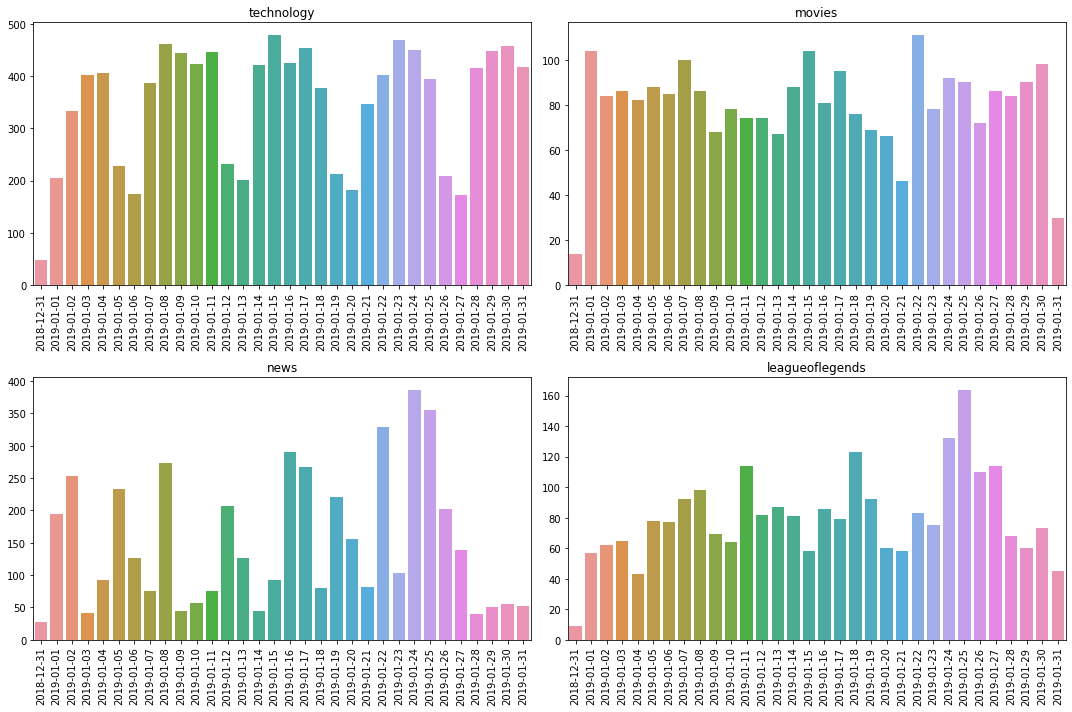

In [0]:
plt.figure(figsize=(15,10))
for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    
    df_topic = data[data.subreddit==topic]
    
    df_date = df_topic['date'].value_counts().sort_index()
    
    plt.subplot(2,2,i+1)
    
    sns.barplot(x=df_date.index, y=df_date.values)
    
    plt.xticks(rotation='vertical')
    
    plt.title(topic)
    
plt.tight_layout()
plt.show()

## 2.5 num_comments and score

&emsp;&emsp;&emsp;From the scatter plots for each topic, we can clearly see there is a positive correlation between these two features for all topics. As the number of comments increases, the scores also increase.  This makes sense since popular postings always have many people comment on them and so that the net scores will also increase. This may inform me that one of these columns could be removed since they are repeated. Therefore, I need to decide which one will have distinct distributions among four topics and easier to be classified so that another one could be removed.


&emsp;&emsp;&emsp;Then, I plotted the distributions of 'num_comments' and 'score' separately for each topic, we can clearly see that number of comments have similar distributions which all have more dense distributions in the small values and fat tails for large value; however, for distributions of scores, we can see the distributions of four different topics have relatively distinct patterns, for example, topic 'technology' has very constant and high density between score values below 40000; 'movies' and 'news' have opposite density at scores around 40000.


&emsp;&emsp;&emsp;Therefore, I can drop num_comments for simplification and only use 'score' instead in the features.

### 2.5.1 Find Correlation

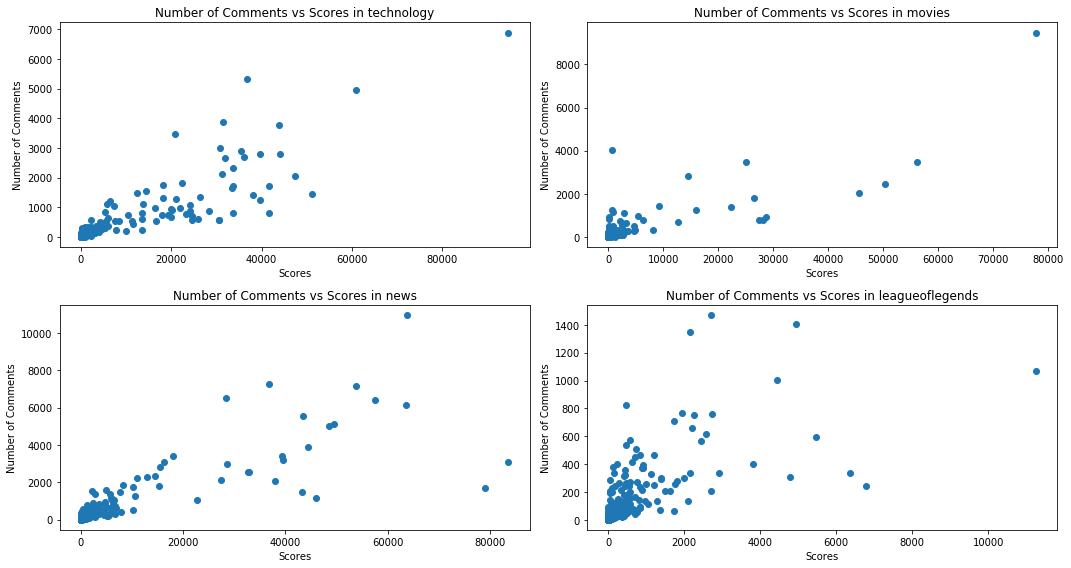

In [0]:
plt.figure(figsize=(15,8))
for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    df_temp = data[data.subreddit == topic]
    x = df_temp['score']
    y = df_temp['num_comments']
    plt.subplot(2,2,i+1)
    plt.plot(x,y,'o')
    plt.xlabel('Scores')
    plt.ylabel('Number of Comments')
    plt.title('Number of Comments vs Scores in ' + topic)

plt.tight_layout()
plt.show()

### 2.5.2 Distribution of num_comments

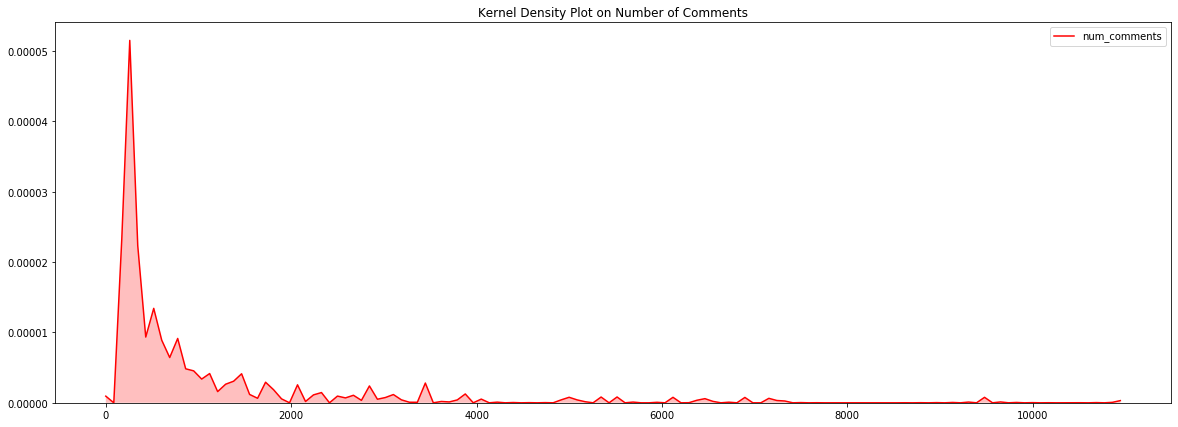

In [0]:
#num_comments
plt.figure(figsize=(20,7))
sns.kdeplot(data.num_comments,shade=True,color='r')
plt.title('Kernel Density Plot on Number of Comments')
plt.show()

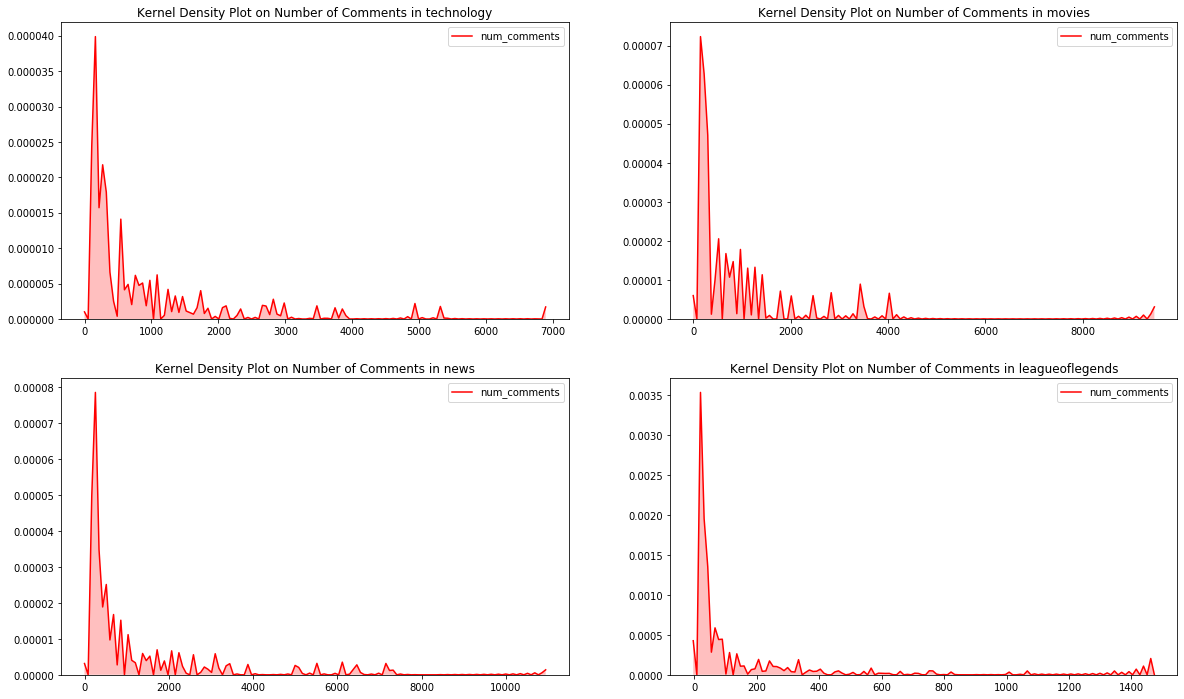

In [0]:
#num_comments
plt.figure(figsize=(20,12))
for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    
    data_temp = data[data.subreddit==topic]
    
    plt.subplot(2,2,i+1)
    
    sns.kdeplot(data_temp.num_comments,shade=True,color='r')
    
    plt.title('Kernel Density Plot on Number of Comments in '+topic)
plt.show()

### 2.5.3 Distribution of score

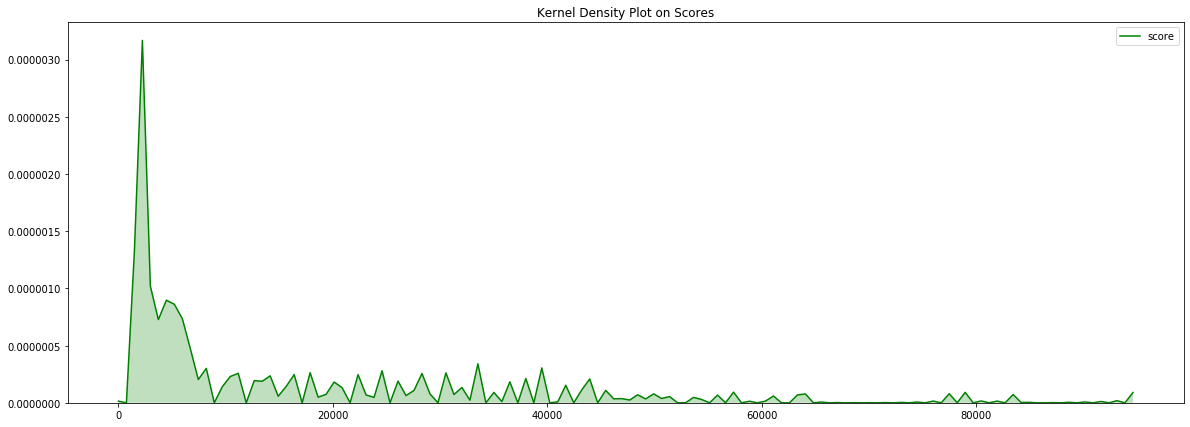

In [0]:
#scores
plt.figure(figsize=(20,7))
sns.kdeplot(data.score,shade=True,color='g')
plt.title('Kernel Density Plot on Scores')
plt.show()

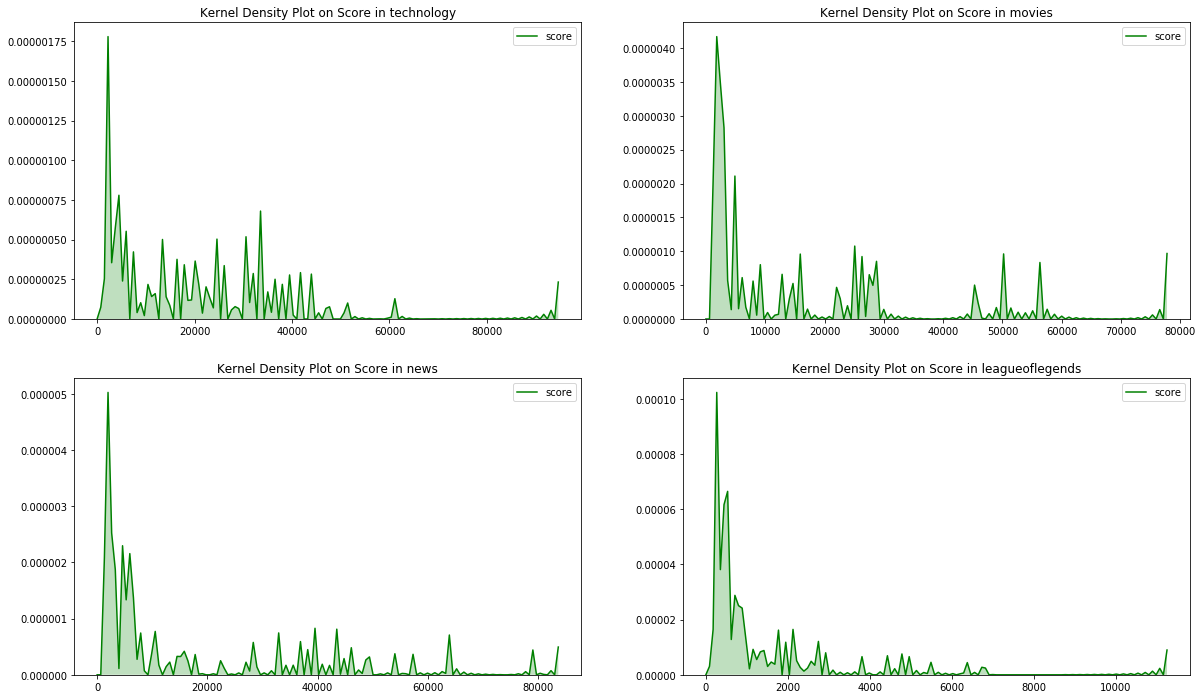

In [0]:
#scores
plt.figure(figsize=(20,12))
for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    
    data_temp = data[data.subreddit==topic]
    
    plt.subplot(2,2,i+1)
    
    sns.kdeplot(data_temp.score,shade=True,color='g')
    
    plt.title('Kernel Density Plot on Score in '+topic)
plt.show()

## 2.6 Topics Mentioned in URLs 

&emsp;&emsp;&emsp;It is very interesting that some urls already included the topic names in them, however, the proportion of them is less than 50% percent as shown in the left pie chart below; inside the proportions where topics are in urls, the distribution of each topic is not evenly distributed, 'technology' still has the largest proportion and 'movie' has the smallest. Using urls as the features to make predictions may get a more accurate results on the 'technology' and 'news' since the a large proportion of topic names are shown in the links already, however, there are still more than half of the urls do not have this property.


&emsp;&emsp;&emsp;Then, I extract and visualize the common words appeared in urls for each topic by word clouds. The results were quite surprising, they did show the distinct words for each subreddit such as 'google', 'facebook', 'apple' and 'data' in topic 'technology' and 'netflix', 'youtube' and 'trailer' in topic 'movies'. This may inform that, the texts in urls could be cleaned and added to the features as they are good indicators to the specified topics.

### 2.6.1 Distributions

In [0]:
topic_mentioned = dict((topic,0) for topic in my_subreddits)
for topic in topic_mentioned:
    for text in data['url']:
        if str(topic) in text:
            topic_mentioned[topic] += 1

In [0]:
topics_inurls = sum(topic_mentioned.values())
topics_notinurls = len(data) - topics_inurls
topic_urls = {'topics in urls':topics_inurls,
              'topics not in urls':topics_notinurls}

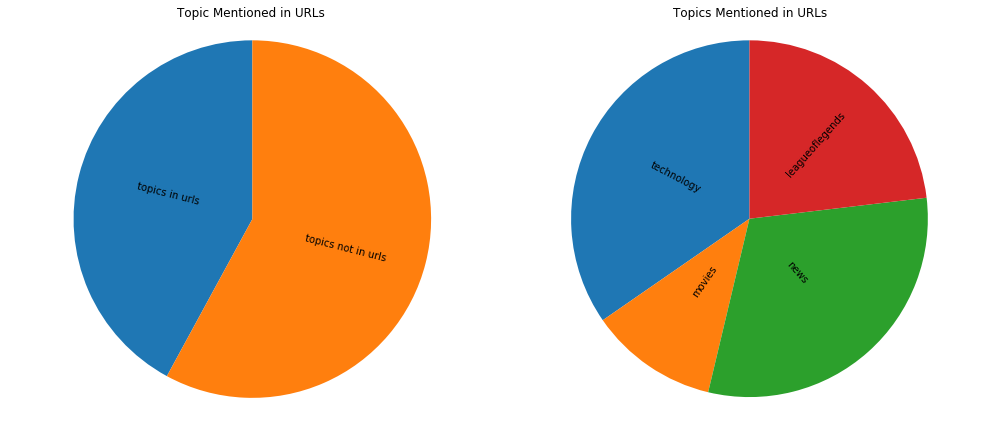

In [0]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(topic_urls.values(),labels=topic_urls.keys(),rotatelabels=True, labeldistance=0.3, pctdistance=0.5, startangle=90)
plt.title('Topic Mentioned in URLs')
plt.axis('equal')
plt.tight_layout()


plt.subplot(1,2,2)
plt.pie(topic_mentioned.values(),labels=topic_mentioned.keys(),rotatelabels=True, labeldistance=0.3, pctdistance=0.5, startangle=90)
plt.title('Topics Mentioned in URLs')
plt.axis('equal')
plt.tight_layout()
plt.show()

### 2.6.2 Top Words in URLs

In [0]:
#define function can find top k keywords in specified column
def get_topk_inurl(df, topic, k):
    
    lemmatizer = WordNetLemmatizer()
    stops = set(stopwords.words('english'))
    stops.add('https')
    stops.add('http')
    stops.add('html')
    stops.add('htmls')
    stops.add('amp')
    stops.add('amps')
    stops.add('The')
    stops.add('www')
    stops.add('com')
    stops.add('reddit')
    stops.add('comments')
    stops.add('jpg')
    stops.add('png')
    stops.add('org')

    df_topic = df[df.subreddit==topic]
    lines = df_topic['url'].values
    
    counter = Counter()
    
    for text in lines:
        #remove posting id
        text = re.sub('/a\w{5}','',str(text))
        #remove underscores
        text = re.sub('_',',',text)
        #remove numbers
        text = re.sub('\d','',text)
        counter.update([lemmatizer.lemmatize(word.lower()) for word in re.findall(r'\w+', text) if word.lower() not in stops and len(word) > 2])
    topk = counter.most_common(k)
    
    #plot word cloud
    x,y = map(list,zip(*topk))
    words_string = (' ').join(x)
    wordcloud = WordCloud(background_color="black",width=1000, height=800,max_font_size=150,collocations=False).generate(words_string)
    plt.imshow(wordcloud)
    plt.title(topic,fontsize=15)
    plt.axis('off')

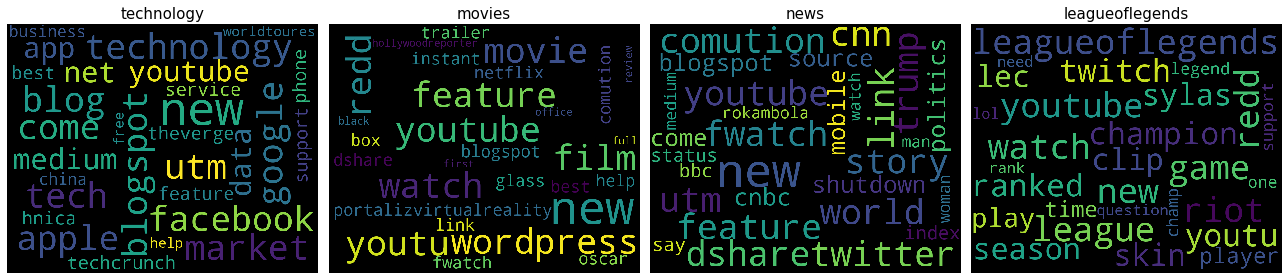

In [0]:
plt.figure(figsize=(18,6))

for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    
    plt.subplot(1,4,i+1)
    
    get_topk_inurl(data, topic, 30)

plt.tight_layout()

## 2.7 Common Words in Titles

I plotted the word clouds for each of the topics:

- technology: keywords such as 'facebook', 'google', 'apple' and 'microsoft' are companies names who are dominant in technology areas, they are strong indicators to technology topics; other words like 'phone', 'software', 'iphone', 'router' are all related to techonological products;


- movies: some indicators such as 'movie', 'film', 'trailer', 'oscar', 'netflix', 'actor' and 'director' appear very frequently in this topic; some specific movie names 'Aquaman'and 'Spider' appeared as well as they may released the trailers or the movies at that time period, however, the movie names could not be extracted fully by single words, I may need to think about another method;


- news: words like 'new', 'police', 'trump', 'government', 'state', 'man' and 'woman' are all indicators to this topic and people tend to talk about things related to the United States, president Trump, police department and gender issues;


- leagueoflegends: different forms of topic name such as 'lol', 'legend' and 'league', also, some words like 'champion', 'season', 'ranked', 'player', 'support', 'sylas' and 'riot' are all related to the topic.


&emsp;&emsp;&emsp;Single keywords as features can give the model distinct words to each subreddit and therefore will be good for the models. However, single words may not be good enough to look into insights of each topic since some terms are connected and related to each other. Therefore, I used Noun Phrases to see deeper inside each topic.

In [0]:
#define function can find top k keywords in specified column
def topk_keywords(df, topic, k):
    
    lemmatizer = WordNetLemmatizer()
    stops = set(stopwords.words('english'))
    df_topic = df[df.subreddit==topic]
    lines = df_topic['title'].values
    counter = Counter()
    for line in lines:
        counter.update([lemmatizer.lemmatize(word.lower()) for word in re.findall(r'\w+', line) if word.lower() not in stops and len(word) > 2])
    topk = counter.most_common(k)
    
    return topk

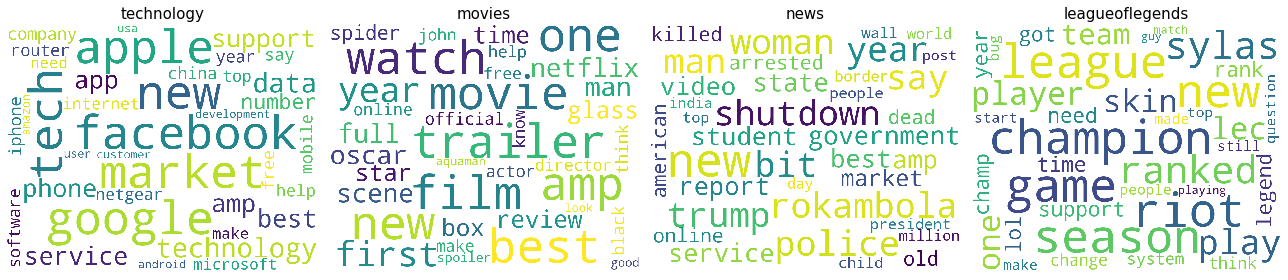

In [0]:
plt.figure(figsize=(18,6))
for i in range(len(my_subreddits)):
    topic = my_subreddits[i]
    topk_words = topk_keywords(data, topic, 40)
    x,y = map(list,zip(*topk_words))
    words_string = (' ').join(x)
    plt.subplot(1,4,i+1)
    wordcloud = WordCloud(background_color="white",width=1000, height=800,max_font_size=150,collocations=False).generate(words_string)
    plt.imshow(wordcloud)
    plt.title(topic,fontsize=15)
    plt.axis('off')
plt.tight_layout()
plt.show()

## 2.8 Common Noun Phrases in Titles

I explored more on the key phrases in each one of the topics by using noun phrases instead of single words.


- technology: more specfic indicators are shown such as: 'artificial intelligence', 'netgear router', 'mark zuckerberg',' elon musk', 'william megelich', 'tim cook';


- movies: 'spider man', 'virtual reality', 'john wick' ,'bird box', balck panther', 'levin hart' and other moview names and actor names are shown;


- news: 'government shutdown', 'auto insurance', 'border wall', 'president trump', 'white house', 'donald trump' are some hot topics in new that year and popular people mentioned very frequently;


- leagueoflegends: 'post match', 'new champion', 'nexus blitz', 'new season', 'new ranked system', 'solo queue' and so on are some terms that very relevant to the game.

&emsp;&emsp;&emsp;Some bi-grams appeared very often in all topics and they are very distinctive which inform me that bigrams could be used as features as well to help make the classifications. However, to use bi-grams will exponentially increase the size the input features, so there is a tradeoff.

In [0]:
#define taggers
tagger = PerceptronTagger()
pos_tag = tagger.tag

grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [0]:
# Noun Phrase Extraction Support Functions
stopwords_eng = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords_eng)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [0]:
#define funtion to extract top k noun phrases
def topk_NP(df,topic,k):
    
    df_topic = df[df.subreddit==topic]
    lines = df_topic['title'].values
    counter = Counter()
    for line in lines:
            counter.update(flatten([word for word in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', line))))]))
    topk = counter.most_common(k)
    
    return topk

In [0]:
title_NP = dict((topic,0) for topic in my_subreddits)
for topic in title_NP:
    topk_phrases = topk_NP(data, topic, 20)
    title_NP[topic] = topk_phrases

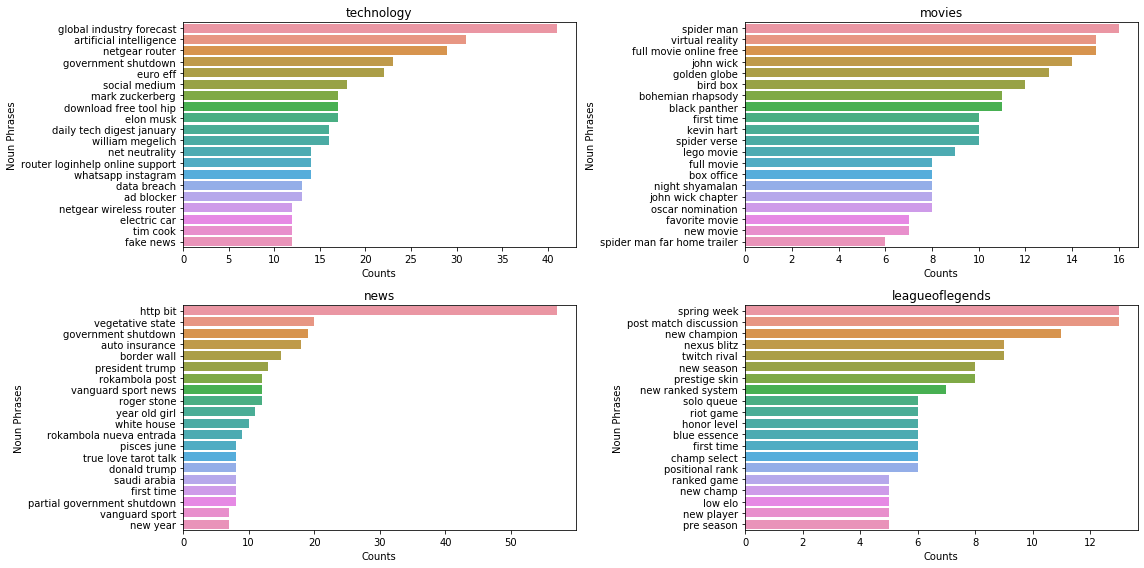

In [0]:
plt.figure(figsize=(16,8))
for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    dic = title_NP[topic]
    x,y = map(list,zip(*dic))
    plt.subplot(2,2,i+1)
    sns.barplot(x=y,y=x)
    plt.title('{}'.format(topic))
    plt.ylabel('Noun Phrases')
    plt.xlabel('Counts')
    
plt.tight_layout()
plt.show()

## 2.9 selftext

&emsp;&emsp;&emsp;The pie chart on the left side gives the distributions of selftexts, we can see less than 10% of the entire dataset have the selftext in the postings and others are either deleted or totally blank. Inside the 10% selftexts, we can clearly see only three topics are included as topic 'news' does not have any selftext at all. 'leagueoflegends' have almost 80% over the selftexts and 'technology' barely have them.


&emsp;&emsp;&emsp;I will not include the self texts as features since they may induce bias to the specified topics if include a large amount of selftexts from that topic in the features, as well as self texts may induce more noises to the classfiers. 

In [0]:
data['selftext_label'] = ''
for i in list(data.index):
    
    text = data.loc[i,'selftext']
    
    if text == '[deleted]':
        
        data.loc[i,'selftext_label'] = 'deleted'
        
    elif text == '[removed]':
        
        data.loc[i,'selftext_label'] = 'removed'
    
    elif text == '':
        
        data.loc[i,'selftext_label'] = 'blank'
    
    else:
        
        data.loc[i,'selftext_label'] = 'text'

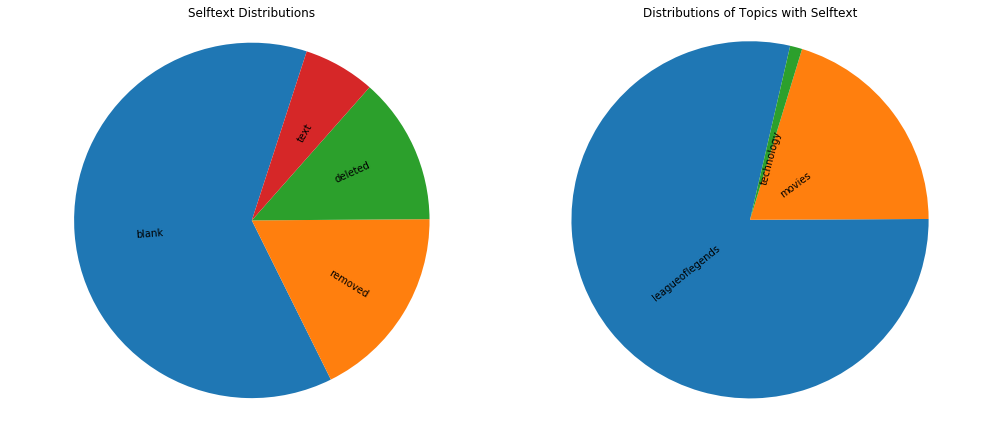

In [0]:
selftext_count = data.selftext_label.value_counts()
df_text = data[data.selftext_label=='text']
topic_text = df_text.subreddit.value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(selftext_count.values,labels=selftext_count.index,rotatelabels=True, labeldistance=0.5, pctdistance=0.8, startangle=72)
plt.title('Selftext Distributions')
plt.axis('equal')


plt.subplot(1,2,2)
plt.pie(topic_text.values,labels=topic_text.index,rotatelabels=True, labeldistance=0.2, pctdistance=0.5, startangle=77)
plt.title('Distributions of Topics with Selftext')
plt.axis('equal')

plt.tight_layout()
plt.show()

# <center>Part 3: Classification<center>

## 3.1 Data Preparation

**Procedures**

- Clean Texts in URLs and Titles;
- If Authors' information has showed except for '[deleted]', combine the user name with cleaned words from URL and Title for each posting to strings; otherwise, if no author or author is '[deleted]', combine only URL and Title to strings. Save the combined features in column 'preprocessed';
- Label encoding subreddit and time columns;
- Removed useless columns such as 'selftext', 'id' and 'created_utc';

In [0]:
df = data.copy()

### 3.1.1 Clean Texts

&emsp;&emsp;&emsp;As we discussed in the EDA sections, I certaily need to clean the text in both titles and urls. Stop words and other words apeared very frequently without any meanings will be removed from the texts. Furthermore, author is a very important feature as we shown in EDA as well, but it includes many user names called '[deleted]', therefore, authors with real author names will be added to the url and title.

In [0]:
def clean_df(data, col, new_col):
    
    df = data.copy()
    for i in list(df.index):
    
        text = df.loc[i,col]
        tokenizer = RegexpTokenizer(r'\w+')
        lemmatizer = WordNetLemmatizer()

        #initialize stopwords
        stops = set(stopwords.words('english'))
        stops.add('https')
        stops.add('http')
        stops.add('html')
        stops.add('htmls')
        stops.add('amp')
        stops.add('amps')
        stops.add('The')
        stops.add('www')
        stops.add('com')
        stops.add('reddit')
        stops.add('comments')
        stops.add('jpg')
        stops.add('png')
        stops.add('org')

        #remove id
        text = re.sub('/a\w{5}','',str(text))

        #remove underscores
        text = re.sub('_',',',text)

        #remove numbers
        text = re.sub('\d','',text)

        text = [lemmatizer.lemmatize(word.lower()) for word in tokenizer.tokenize(text) if word not in stops and len(word) > 2]
        
        df[new_col][i] = text
    
    return df

In [0]:
#clean urls
df['url_cleaned'] = ''
df['title_cleaned'] = ''
df_temp = clean_df(df, 'url','url_cleaned')

In [0]:
#clean titles
df = clean_df(df_temp, 'title','title_cleaned')

In [0]:
df.head(3)

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url,date,selftext_label,url_cleaned,title_cleaned
15,abcvwo,HenryHiggensBand,1546301050,movies,I’ve seen several movies/shows over the past f...,6,0,Ones I’ve noticed as being oddly similar that ...,https://www.reddit.com/r/movies/comments/abcvw...,2018-12-31,text,"[movie, ive, seen, several, moviesshows, past]","[seen, several, movie, show, past, year, seem,..."
25,abcwz4,polyhedron_servent,1546301243,technology,bots are taking over,0,1,,https://emojipedia-us.s3.dualstack.us-west-1.a...,2018-12-31,blank,"[emojipedia, dualstack, west, amazonaws, thumb...","[bot, taking]"
40,abcxql,[deleted],1546301367,technology,“Let’s just say every last molecule of you at ...,3,0,[deleted],https://brainworldmagazine.com/transposed-mind...,2018-12-31,deleted,"[brainworldmagazine, transposed, mind, self, a...","[let, say, every, last, molecule, moment, some..."


In [0]:
def combine(row):
    
    analyzer = CountVectorizer().build_analyzer()
    if row['author'] != '[deleted]':
        text = str.join(' ', [str(row['author']),str(row['title_cleaned']), str(row['url_cleaned'])])
        
    else:
        text = str.join(' ', [str(row['title_cleaned']), str(row['url_cleaned'])])
        
    text = text.lower()
    text = str.join(" ", [lemmatizer.lemmatize(w) for w in analyzer(text)])
    
    return text

In [0]:
df['preprocessed'] = df.apply(lambda x: combine(x), axis=1)

In [0]:
df.head(3)

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url,date,selftext_label,url_cleaned,title_cleaned,preprocessed
15,abcvwo,HenryHiggensBand,1546301050,movies,I’ve seen several movies/shows over the past f...,6,0,Ones I’ve noticed as being oddly similar that ...,https://www.reddit.com/r/movies/comments/abcvw...,2018-12-31,text,"[movie, ive, seen, several, moviesshows, past]","[seen, several, movie, show, past, year, seem,...",henryhiggensband seen several movie show past ...
25,abcwz4,polyhedron_servent,1546301243,technology,bots are taking over,0,1,,https://emojipedia-us.s3.dualstack.us-west-1.a...,2018-12-31,blank,"[emojipedia, dualstack, west, amazonaws, thumb...","[bot, taking]",polyhedron_servent bot taking emojipedia duals...
40,abcxql,[deleted],1546301367,technology,“Let’s just say every last molecule of you at ...,3,0,[deleted],https://brainworldmagazine.com/transposed-mind...,2018-12-31,deleted,"[brainworldmagazine, transposed, mind, self, a...","[let, say, every, last, molecule, moment, some...",let say every last molecule moment somehow tra...


### 3.1.2 Label Encoding

&emsp;&emsp;&emsp;Label encoding the subreddit labels for classification and label the date into numerical data. As showed in EDA, dates are somewhat relevant to each of the subreddit since they all have specified patterns in number of postings everyday, therefore, they could help the model to make predictions on the subreddit.

In [0]:
le = LabelEncoder()

In [0]:
df['target'] = le.fit_transform(df['subreddit'])

In [0]:
df['time'] = le.fit_transform(df['date'])

### 3.1.3 Drop Useless Columns

In [0]:
df.drop(['id','created_utc','subreddit','num_comments','selftext','url','date','selftext_label'],axis=1,inplace=True)

In [0]:
finaldf = df[['title','author', 'title_cleaned','url_cleaned','time', 'score','preprocessed','target']]

In [0]:
finaldf.head()

,title,author,title_cleaned,url_cleaned,time,score,preprocessed,target
15,I’ve seen several movies/shows over the past f...,HenryHiggensBand,"[seen, several, movie, show, past, year, seem,...","[movie, ive, seen, several, moviesshows, past]",0,0,henryhiggensband seen several movie show past ...,1
25,bots are taking over,polyhedron_servent,"[bot, taking]","[emojipedia, dualstack, west, amazonaws, thumb...",0,1,polyhedron_servent bot taking emojipedia duals...,3
40,“Let’s just say every last molecule of you at ...,[deleted],"[let, say, every, last, molecule, moment, some...","[brainworldmagazine, transposed, mind, self, a...",0,0,let say every last molecule moment somehow tra...,3
42,Name a movie that you LIKE but everyone else L...,MadeInMex,"[name, movie, like, everyone, else, love]","[movie, name, movie, like, everyone, else, love]",0,0,madeinmex name movie like everyone else love m...,1
43,Louis C.K. mocks Parkland students in audio of...,noonehas3,"[louis, mock, parkland, student, audio, stand,...",[eeacdaacfdc],0,0,noonehas3 louis mock parkland student audio st...,2


## 3.2 Feature Engineering

**Procedures**

- Convert word features into binary, bag of words and TF-IDF weightings, respectively;
- Compress them into Sparse Matrix to save time of computation and memory;
- Splitting entire dataset to 70% for training and 30% for test, use stratified attribute. (justification provided in section 3.3)

### 3.2.1 Binary

&emsp;&emsp;&emsp;Binary features is a very simple approach to encoding: a binary scoring of the presence or absence of words. If a word appeared in current posting, it gives a '1' and '0' otherwise. It equally weight every word in the features.

In [0]:
df_temp = df.url_cleaned + df.title_cleaned
df_comb = pd.Series(index=df_temp.index)

In [0]:
for i in list(df_temp.index):
    
    if finaldf.loc[i,'author'] != '[deleted]':
        
        df_comb[i] = finaldf.loc[i,'author'].lower().split() + df_temp[i]
    else:
        df_comb[i] = df_temp[i]

In [0]:
word_counter = Counter()
for i in list(df_comb.index):
    line = df_comb[i]
    word_counter.update(line)

In [0]:
word_list = [word for word in dict(word_counter).keys()]

In [0]:
df_rows = []
for i in list(df_comb.index):
    line = df_comb[i]
    df_rows.append([1 if word in line else 0 for word in word_list])

In [0]:
df_bin = pd.DataFrame(df_rows, columns=word_list)
df_bin.index = finaldf.index

In [0]:
df_bin.head(3)

,henryhiggensband,movie,ive,seen,several,moviesshows,past,show,year,seem,...,bmhdv,hdv,ioojko,influentik,kfoxtv,ukybelswcdiqicthtpjzceycjggfpimhbxdkqmpw,goodlatte,tomnookballs,commentsofilled,cjfebus
15,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
array_B = sp.sparse.csr_matrix(df_bin.values)

In [0]:
array_B.shape

(21002, 41581)

In [0]:
#Split into train and test dataset
Xb_train, Xb_test, yb_train, yb_test = train_test_split(array_B, finaldf['target'],test_size=0.3, stratify=finaldf['target'])

### 3.2.2 Word Frequency

&emsp;&emsp;&emsp;Word Frequency approach uses the frequency of a word appearance as the numerical feature and converts the collection of text documents to a sparse matrix of token counts. The CountVectorizer function from the sklearn library will be used to extract the word frequency feature; before that, a string of words is required to count word as an argument to count the frequency.

In [0]:
# Bag of Words model
# Only transforming sentiment_tweets data here
vec_bw = CountVectorizer(stop_words='english')
array_WF = vec_bw.fit_transform(finaldf['preprocessed'])

In [0]:
array_WF.shape

(21002, 41294)

In [0]:
#Split into train and test dataset
Xwf_train, Xwf_test, ywf_train, ywf_test = train_test_split(array_WF, finaldf['target'],test_size=0.3,stratify=finaldf['target'])

### 3.2.3 TF-IDF

&emsp;&emsp;&emsp;TF stands for term frequency and it is calculated as the number of times a term appears in a document divided by the total number of words of the document. The normalization mitigates the bias caused by the different document length.
IDF stands for inverse ducument frequency and it reveals how rare a term is across the entire corpus.
The product of TF and IDF gives us the result of weightings of each word.

&emsp;&emsp;&emsp;Term Frequency-Inverse Document Frequency is a statistical measure for the importance of a word to the corpus. The importance increases proportionally to the number of times a word appears in the document but decreases with increasing number of documents which contain the word. For example, stopwords have high frequency in a document obviously but they are meaningless for useful information, therefore, document frequency can help decrease the weightings on the stopwords since it decreases as more documents contain stopwords.

In [0]:
vec_tfidf = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None,stop_words='english')
array_TFIDF = vec_tfidf.fit_transform(df['preprocessed'])

In [0]:
array_TFIDF.shape

(21002, 41294)

In [0]:
# Split into train and test dataset
Xidf_train, Xidf_test, yidf_train, yidf_test = train_test_split(array_TFIDF, finaldf['target'],test_size=0.3,stratify=finaldf['target'])

## 3.3 Model Implementation with Cross Validation

### <center><span style="color:Green">Justifications


### Metrics

&emsp;&emsp;&emsp;In this dataset, as discussed in the above sections, we can clearly see there is an imbalance: topics 'movies' and 'leagueoflegends' have the fewest data and topic 'technology' is six times bigger than them, topic 'news' is in between. Therefore, predictions will be biased to the majority classes and make the classifications not accurate as a balanced dataset. Accuracy as a classic performance metric on classifications calculates the number of true predictions over total number of data, it will be a misleading result for an imbalanced dataset. 
1. ***Precision and Recall***
    
&emsp;&emsp;&emsp;Precision and recall could be useful when evaluating the performance of a multiclass imbalanced dataset. Precision and recall for each class could be calculated to see whether the samples in each class are predicted correctly, a confusion matrix would help us to visualize the proportions of true positive and true negative more clearly. Precision and Recall could be averaged to get the averaged value of them to evaluate the performance over all classes. Furthermore, a precision-recall curve could also be used which shows the trade-off between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.
    
    
2. ***ROC and AUC***
    
&emsp;&emsp;&emsp;ROC is curve of true positive rate vs. false positive rate bor a binary classification problem. It tells how much model is capable of distinguishing between two classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s, and a curve at the top left corner is always preferable. ROC is typically used in binary classifications, however, in this project, we have four subreddits to be classfied, therefore, the outputs needs to be binarized if using ROC as the performance metric. In multi-class model, we can plot N number of AUC ROC Curves for N number classes using One vs ALL methodology. So for Example, If you have four classes named A, B, C and D, you will have one ROC for A classified against B, C and D, another ROC for B classified against A, C and D, and so on.
    
    
3. ***F1 Scores***
    
&emsp;&emsp;&emsp; F1 score is a balanced measurements of harmonic mean of precision and recall, it is a conservative way to measure the classifications which could help a imbalanced datasets a lot. There are three different ways to calculate the F1 score according to different natures in the dataset: samples, micro, macro and weighted. For an imbalanced dataset in our case, we do not want the predictions dominated by majority of the class and ignore the minority.'samples' F1 score is for multi-label problem which is not our case; 'Weighted' F1 score calculates for each class independently and use weightings according to the number of true labels of that class which will not help us since it will still give more weightings to the class with more data; 'micro' one use global values of TP, FN, FP directly and does not favor any of the classes; 'macro' is the one I use in this project since it separately calculates F1 scores for each class and will not weight each class by considering the proportions of the class in the dataset.
    
&emsp;&emsp;&emsp;In conclusion, the metric used in this project is **Macro F1 Score** with reasons: it not only balance the values between precisions and recall over all classes, but also takes data imbalance into consideration. For the implementation later, F1 score could give me a single-value metric to evaluate the performance of the model and get the best hyper parameters.
   

### Evaluation Methods

- ***Stratified Training and Test Splitting*** 

&emsp;&emsp;&emsp;The original dataset is divided into 70% for training dataset and 30% for testing. Training dataset was used to fit the machine learning model and let the model learn the patterns in the data, then we need to use the test data to provide an unbiased evaluation of the model; if we do not do so, i.e. using entire dataset to train the model and make predictions over the same entire data, the results will be biased since this is kind of cheating (the models have already seen the data). Therefore, it is very necessary to split the data to let the model test on the unseen data and provide a unbiased feedback. I used 70:30 as the reasonable splitting ratios because the model is not only well trained by enough data but also test the model on a fairly big test set. I also used 'stratify' attribute to split the data based on the percentage of four labels. The reason behind this is: this dataset is not balanced, 'movies' and 'leagueoflegends' have very few data, if we randomly split the dataset, there will a large chance that these two topics won't get enough data to train on.


- ***GridSearch Cross-Validation*** 

&emsp;&emsp;&emsp;I used cross validation during hyperparameter tuning process. For text classification problem in this project, the number of features is more than 40000 and the machine learning models are very likely to get overfitting on unseen data which will generate a very good training accuracy but an undesireable test accuracy. Cross validation could be used to reduce this problem. More conveniently, cross validation could be used with hyperparameter tuning at the same time by GridSearchCV(), I only need to define the number of folds for cross validation and the metric I want to use (macro F1 in this case).

### <center><span style="color:Green">Hyperparameter Tuning
&emsp;&emsp;&emsp;This part used the features include columns 'url_cleaned', 'title_cleaned' and 'authors', they are all combined into one column called 'preprocessed' and it is engineered by three different methods in the above section and will be directly used into four models. They will be implemented and each one of them will be tuned to get the best hyperparameters for later analysis.
    
**Procedures:**
1. Generate dictionary for hyperparameters for each algorithm
2. Initialize models
3. For Binary, WF and TFIDF features, use GridSearchCV() with 10 folds cross-validation separately to obtain the average cross-validation F1 Score for all three types of features
4. Train the model with optimal hyperparameters with the training data and apply the trained optimal model on the test dataset, print out its macro F1 score

**Choosing the Optimal Model by tunning the hyperparameters** (try models with binary, WF and TFIDF features separately) (Each hyperparameter is explained in corresponding sections)

- Logstic Regression {C, solver, multi_class}
- Multinomial Naive Bayes {alpha}
- Support Vector Machine {C, multi_class}
- Random Forest {max_depth, min_samples_split}


#### Results of Best Hyperparameters

|Algorithms|<center>Binary|<center>Word Frequency|<center>TF-IDF|
|----------|------|---- ---------|------|
|Logistic Regression|'C': 100, 'solver': 'lbfgs', 'multi_class': 'ovr'|'C': 10, 'solver': 'liblinear', 'multi_class': 'ovr'|'C': 0.1, 'solver': 'liblinear', 'multi_class': 'ovr'|
|Multinomial Naive Bayes|'alpha': 1|'alpha': 1|'alpha': 20|
|Support Vector Machine|'C' = 1, 'multi_class': 'ovr'|'C' = 0.1, 'multi_class': 'ovr'|'C' = 0.01, 'multi_class': 'ovr'|
|Random Forest|'max_depth' = 200, 'min_samples_split' = 5|'max_depth' = 200, 'min_samples_split' = 5|'max_depth' = 200, 'min_samples_split' = 10|

### <center><span style="color:Green">Detailed Model Implementations


### <span style="color:Blue">3.3.1 Logistic Regression

&emsp;&emsp;&emsp;Hyper-parameters tuned in logistic regression is C which represents the the inverse of regularization term. C can control the extent of overfitting, small C will induce large regularization which penalize more on large weights to reduce overfitting and vice versa. solver and multi_class are also tuned to get the best performance of LR in multiclass classification problem.

1. Binary Features
    - Best Model: 'C': 100, 'solver': 'lbfgs', 'multi_class': 'ovr'
    - F1 Scores: F1 Score for Training: 99.92% and F1 Score for Test: 91.49%



1. Word Frequency
    - Best Model: 'C': 10, 'solver': 'liblinear', 'multi_class': 'ovr'
    - F1 Scores: F1 Score for Training: 99.96% and F1 Score for Test: 90.3%



2. TF-IDF
    - Best Model: 'C': 0.1, 'solver': 'liblinear', 'multi_class': 'ovr'
    - F1 Scores: F1 Score for Training: 99.93% and F1 Score for Test: 91.18%

**3.3.1.1. Logistic Regression with Binary Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'C':[0.01, 0.1, 1, 10, 100], 'solver':['liblinear','lbfgs', 'newton-cg'],'multi_class':['ovr','multinomial']}

clf_lr = LogisticRegression(max_iter=10000)
clf = GridSearchCV(clf_lr, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xb_train, yb_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 91.53%
The best parameter:
 {'C': 100, 'multi_class': 'ovr', 'solver': 'lbfgs'}


##### Best Model of LR using Binary Features

In [0]:
clf = LogisticRegression(C=100, solver='lbfgs',multi_class='ovr',max_iter=10000)
clf.fit(Xb_train, yb_train)

train_pred = clf.predict(Xb_train)
train_acc = f1_score(yb_train, train_pred,average='macro')

test_pred = clf.predict(Xb_test)
test_acc = f1_score(yb_test, test_pred,average='macro')   

print("Model: Logistic Regression with Binary Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Logistic Regression with Binary Features
F1 Score for Training: 99.92%
F1 Score for Test: 91.49%


**3.3.1.2. Logistic Regression with Word Frequency Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'C':[0.01, 0.1, 1, 10, 100], 'solver':['liblinear','lbfgs', 'newton-cg'],'multi_class':['ovr','multinomial']}

clf_lr = LogisticRegression(max_iter=10000)
clf = GridSearchCV(clf_lr, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xwf_train, ywf_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 90.26%
The best parameter:
 {'C': 10, 'multi_class': 'ovr', 'solver': 'liblinear'}


##### Best Model of LR using WF

In [0]:
clf = LogisticRegression(C=10, solver='liblinear',multi_class='ovr',max_iter=10000)
clf.fit(Xwf_train, ywf_train)

train_pred = clf.predict(Xwf_train)
train_acc = f1_score(ywf_train, train_pred,average='macro')

test_pred = clf.predict(Xwf_test)
test_acc = f1_score(ywf_test, test_pred,average='macro')   

print("Model: Logistic Regression with Word Frequency Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Logistic Regression with Word Frequency Features
F1 Score for Training: 99.96%
F1 Score for Test: 90.3%


**3.3.1.3. Logistic Regression with TF-IDF Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'C':[0.01, 0.1, 1, 10, 100], 'solver':['liblinear','lbfgs', 'newton-cg'],'multi_class':['ovr','multinomial']}

clf_lr = LogisticRegression()
clf = GridSearchCV(clf_lr, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xidf_train,yidf_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 90.85%
The best parameter:
 {'C': 0.1, 'multi_class': 'ovr', 'solver': 'liblinear'}


##### Best Model of LR using TF-IDF

In [0]:
clf = LogisticRegression(C=0.1, solver='liblinear',multi_class='ovr',max_iter=10000)
clf.fit(Xidf_train, yidf_train)

train_pred = clf.predict(Xidf_train)
train_acc = f1_score(yidf_train, train_pred,average='macro')

test_pred = clf.predict(Xidf_test)
test_acc = f1_score(yidf_test, test_pred, average='macro')   

print("Model: Logistic Regression with TF-IDF Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Logistic Regression with TF-IDF Features
F1 Score for Training: 99.93%
F1 Score for Test: 91.18%


### <span style="color:Blue">3.3.2 Multinomial Naive Bayes

&emsp;&emsp;&emsp;Multinomial Naive Bayes is a simple algorithm good at text classification and has been used broadly in information retrieval and text mining areas. It highly depends on the dataset since it has a strong assumption which is the features are conditionally independent with each other given the classes. NB has a linear computation time and is very fast to tune. Alpha is the additive (Laplace/Lidstone) smoothing parameter.

1. Binary Features
    - Best Model: 'alpha': 1
    - F1 Scores: F1 Score for Training: 96.79% and F1 Score for Test: 90.15%


2. Word Frequency
    - Best Model: 'alpha': 1
    - F1 Scores: F1 Score for Training: 96.8% and F1 Score for Test: 88.84%


3. TF-IDF
    - Best Model: 'alpha': 20
    - F1 Scores: F1 Score for Training: 96.09% and F1 Score for Test: 87.08%

**3.3.2.1. Multinomial Naive Bayes with Binary Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'alpha':[0.01,0.1,1,5,20,100]}

clf_nb = MultinomialNB()
clf = GridSearchCV(clf_nb, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xb_train, yb_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 89.9%
The best parameter:
 {'alpha': 1}


##### Best Model of NB using Binary Features

In [0]:
clf = MultinomialNB(alpha=1)

clf.fit(Xb_train, yb_train)

train_pred = clf.predict(Xb_train)
train_acc = f1_score(yb_train, train_pred,average='macro')

test_pred = clf.predict(Xb_test)
test_acc = f1_score(yb_test, test_pred,average='macro')   

print("Model: Multinomial Naive Bayes with Binary Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Multinomial Naive Bayes with Binary Features
F1 Score for Training: 96.79%
F1 Score for Test: 90.15%


**3.3.2.2. Multinomial Naive Bayes with Word Frequency Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'alpha':[0.01,0.1,1,5,20,100]}

clf_nb = MultinomialNB()
clf = GridSearchCV(clf_nb, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xwf_train, ywf_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 88.73%
The best parameter:
 {'alpha': 1}


##### Best Model of NB using WF

In [0]:
clf = MultinomialNB(alpha=1)
clf.fit(Xwf_train, ywf_train)

train_pred = clf.predict(Xwf_train)
train_acc = f1_score(ywf_train, train_pred,average='macro')

test_pred = clf.predict(Xwf_test)
test_acc = f1_score(ywf_test, test_pred,average='macro')     

print("Model: Multinomial Naive Bayes with Word Frequency Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Multinomial Naive Bayes with Word Frequency Features
F1 Score for Training: 96.8%
F1 Score for Test: 88.84%


**3.3.2.3. Multinomial Naive Bayes with TF-IDF Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'alpha':[0.01,0.1,1,5,20,100]}

clf_nb = MultinomialNB()
clf = GridSearchCV(clf_nb, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xidf_train, yidf_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 87.05%
The best parameter:
 {'alpha': 20}


##### Best Model of NB using TF-IDF

In [0]:
clf = MultinomialNB(alpha=20)
clf.fit(Xidf_train, yidf_train)

train_pred = clf.predict(Xidf_train)
train_acc = f1_score(yidf_train, train_pred,average='macro')

test_pred = clf.predict(Xidf_test)
test_acc = f1_score(yidf_test, test_pred, average='macro')  

print("Model: Multinomial Naive Bayes with TF-IDF Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Multinomial Naive Bayes with TF-IDF Features
F1 Score for Training: 96.09%
F1 Score for Test: 87.08%


### <span style="color:Blue">3.3.3 Support Vector Machine

&emsp;&emsp;&emsp;Support Vector machine is to maximize the margins of the hyperplane that separates two classes, in this model, I assumed the data is linearly separable. Similar to logistic regression, the hyperparameter in SVM is the inverse regularization term C to control the overfitting problem and 'multi_class' is also tuned to get the better method from 'ovr' and 'crammer_singer'.

1. Binary Features
    - Best Model: 'C' = 1, 'multi_class': 'ovr'
    - F1 Scores: F1 Score for Training: 99.92% and F1 Score for Test: 91.33%


2. Word Frequency
    - Best Model: 'C' = 0.1, 'multi_class': 'ovr'
    - F1 Scores: F1 Score for Training: 99.66% and F1 Score for Test: 90.58%


3. TF-IDF
    - Best Model: 'C' = 0.01, 'multi_class': 'ovr'
    - F1 Scores: F1 Score for Training: 99.93% and F1 Score for Test: 91.23%

**3.3.3.1. Support Vector Machine with Binary Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'C':[0.01, 0.1, 1, 10, 100], 'multi_class':['ovr','crammer_singer']}

clf_svm = svm.LinearSVC()
clf = GridSearchCV(clf_svm, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xb_train, yb_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 91.64%
The best parameter:
 {'C': 1, 'multi_class': 'ovr'}


##### Best Model of SVM using Binary Features

In [0]:
clf = svm.LinearSVC(C=1, multi_class='ovr')
clf.fit(Xb_train, yb_train)

train_pred = clf.predict(Xb_train)
train_acc = f1_score(yb_train, train_pred,average='macro')

test_pred = clf.predict(Xb_test)
test_acc = f1_score(yb_test, test_pred,average='macro')    

print("Model: Support Vector Machine with Binary Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Support Vector Machine with Binary Features
F1 Score for Training: 99.92%
F1 Score for Test: 91.33%


**3.3.3.2. Support Vector Machine with Word Frequency Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'C':[0.01, 0.1, 1, 10, 100], 'multi_class':['ovr','crammer_singer']}

clf_svm = svm.LinearSVC()
clf = GridSearchCV(clf_svm, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xwf_train, ywf_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 90.51%
The best parameter:
 {'C': 0.1, 'multi_class': 'ovr'}


##### Best Model of SVM using WF

In [0]:
clf = svm.LinearSVC(C=0.1, multi_class='ovr')
clf.fit(Xwf_train, ywf_train)

train_pred = clf.predict(Xwf_train)
train_acc = f1_score(ywf_train, train_pred,average='macro')

test_pred = clf.predict(Xwf_test)
test_acc = f1_score(ywf_test, test_pred,average='macro')   

print("Model: Support Vector Machine with Word Frequency Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Support Vector Machine with Word Frequency Features
F1 Score for Training: 99.66%
F1 Score for Test: 90.58%


**3.3.3.3. Support Vector Machine with TF-IDF Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'C':[0.01, 0.1, 1, 10, 100], 'multi_class':['ovr','crammer_singer']}

clf_svm = svm.LinearSVC()
clf = GridSearchCV(clf_svm, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xidf_train, yidf_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 90.7%
The best parameter:
 {'C': 0.01, 'multi_class': 'ovr'}


##### Best Model of SVM using TF-IDF

In [0]:
clf = svm.LinearSVC(C=0.01, multi_class='ovr')
clf.fit(Xidf_train, yidf_train)

train_pred = clf.predict(Xidf_train)
train_acc = f1_score(yidf_train, train_pred,average='macro')

test_pred = clf.predict(Xidf_test)
test_acc = f1_score(yidf_test, test_pred, average='macro')  

print("Model: Support Vector Machine with TF-IDF Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Support Vector Machine with TF-IDF Features
F1 Score for Training: 99.93%
F1 Score for Test: 91.23%


### <span style="color:Blue">3.3.4 Random Forest

&emsp;&emsp;&emsp;Random forest is a very advanced machine learning algorithm and it belongs to ensembles. It uses 'boottrap aggregation' tree structure to randomly sampling on both observations and features to increase accuracy of prediction.

1. Binary Features
    - Best Model: max_depth = 200, min_samples_split = 5
    - F1 Scores: F1 Score for Training: 96.12% and F1 Score for Test: 87.05%
    

2. Word Frequency
    - Best Model: max_depth = 200, min_samples_split = 5
    - F1 Scores: F1 Score for Training: 95.99% and F1 Score for Test: 86.93%


3. TF-IDF
    - Best Model: max_depth = 200, min_samples_split = 10
    - F1 Scores: F1 Score for Training: 94.67% and F1 Score for Test: 86.68%

**3.3.4.1. Random Forest with Binary Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'max_depth':[1,5,10,100,200],
             'min_samples_split':[2,5,10,20]}

clf_rf = RandomForestClassifier()
clf = GridSearchCV(clf_rf, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xb_train, yb_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 86.54%
The best parameter:
 {'max_depth': 200, 'min_samples_split': 5}


##### Best Model of RF using Binary Features

In [0]:
clf = RandomForestClassifier(max_depth=200, min_samples_split=5)
clf.fit(Xb_train, yb_train)

train_pred = clf.predict(Xb_train)
train_acc = f1_score(yb_train, train_pred,average='macro')

test_pred = clf.predict(Xb_test)
test_acc = f1_score(yb_test, test_pred,average='macro')  

print("Model: Random Forest with Binary Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Random Forest with Binary Features
F1 Score for Training: 96.12%
F1 Score for Test: 87.05%


**3.3.4.2. Random Forest with Word Frequency Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'max_depth':[1,5,10,100,200],
             'min_samples_split':[2,5,10,20]}

clf_rf = RandomForestClassifier()
clf = GridSearchCV(clf_rf, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xwf_train, ywf_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 86.37%
The best parameter:
 {'max_depth': 200, 'min_samples_split': 5}


##### Best Model of RF using WF

In [0]:
clf = RandomForestClassifier(max_depth=200, min_samples_split=5)
clf.fit(Xwf_train, ywf_train)

train_pred = clf.predict(Xwf_train)
train_acc = f1_score(ywf_train, train_pred,average='macro')

test_pred = clf.predict(Xwf_test)
test_acc = f1_score(ywf_test, test_pred,average='macro')    

print("Model: Random Forest with Word Frequency Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Random Forest with Word Frequency Features
F1 Score for Training: 95.99%
F1 Score for Test: 86.93%


**3.3.4.3. Random Forest with TF-IDF Features**

##### Hyper-Parameter Tuning by Cross-Validation

In [0]:
parameters = {'max_depth':[1,5,10,100,200],
             'min_samples_split':[2,5,10,20]}

clf_rf = RandomForestClassifier()
clf = GridSearchCV(clf_rf, parameters, cv=10, n_jobs=-1,scoring='f1_macro')
clf.fit(Xidf_train, yidf_train)

print('The best cross-validation score: {}%'.format(round(clf.best_score_*100,2)))
print('The best parameter:\n', clf.best_params_)

The best cross-validation score: 86.87%
The best parameter:
 {'max_depth': 200, 'min_samples_split': 10}


##### Best Model of RF using TF-IDF

In [0]:
clf = RandomForestClassifier(max_depth=200, min_samples_split=10)
clf.fit(Xidf_train, yidf_train)

train_pred = clf.predict(Xidf_train)
train_acc = f1_score(yidf_train, train_pred,average='macro')

test_pred = clf.predict(Xidf_test)
test_acc = f1_score(yidf_test, test_pred, average='macro')   

print("Model: Random Forest with TF-IDF Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Model: Random Forest with TF-IDF Features
F1 Score for Training: 94.67%
F1 Score for Test: 86.68%


### <center><span style="color:Green">Summary of Results
 

***Binary Features*** 

|Algorithms|Training F1 Score|Test F1 Score|
|----------|-------- --------|---- --------|
|Logistic Regression|99.92%|**91.49%**|
|Multinomial Naive Bayes|96.79%|90.15%|
|Support Vector Machine|99.92%|91.33%|
|Random Forest|96.12%|87.05%|


***Word Frequency Features*** 

|Algorithms|Training F1 Score|Test F1 Score|
|----------|-------- --------|---- --------|
|Logistic Regression|99.96%|90.30%|
|Multinomial Naive Bayes|96.80%|88.84%|
|Support Vector Machine|99.66%|**90.58%**|
|Random Forest|95.99%|86.93%|



***TF-IDF Features*** 

|Algorithms|Training F1 Score|Test F1 Score|
|----------|-------- --------|---- --------|
|Logistic Regression|99.93%|91.18%|
|Multinomial Naive Bayes|96.09%|87.08%|
|Support Vector Machine|99.93%|**91.23%**|
|Random Forest|94.67%|86.68%|

### <center><span style="color:Green">Discussion


### Performance of Models


- &emsp;&emsp;&emsp;The best F1 score is achieved by **Logistic Regression** by using binary features. Support Vector Machine gets the relatively best performance in average among three different feature encoding methods. These two algorithms are both binary linear classifiers, but they performed very well by using One vs Rest multi calssification method. It involves splitting the multi-class dataset into multiple binary classification problems. They are then trained on each binary classification problem and predictions are made using the model that is the most confident. One of the problems could be the computation complexity, since it needs the number of binary classifiers equal to he number of classes, therefore, for a large dataset with many labels, there will be many classfiers to train. Furthermore, linear separators are very easy to get overfitting when the number of features is way larger than the number of sample, therefore, carfully hyperparameter tuning is necessary for both logistic Regression and Support Vector Machine;


- &emsp;&emsp;&emsp;Multinomial Naive Bayes model achieved very similarly scores to SVM and LR in binary and word frequency features, however, it performed worse in TF-IDF features, the reason behind this could be multinomial NB is better at discrete features such as binary and word counts but worse at fractional features like TF-IDF does. Naive Bayes models have linear time complexity anf therefore very fast to train;


- &emsp;&emsp;&emsp;Random Forest has the lowest scores compared to other three algorithms. Random forest as the most powerful ensemle algorithm, should be the best model for classifications but it did not in my case. I can think of two possible reasons for the bad performance: firstly, Sparsity - random forest used boot-strap and for text classifications, the number of features is huge and one instance could only have a few nonzero values which are words included in titles and all zeros anywhere else. Thereforem, the data is very sparse, for some nodes in the trees, the bootstrapped samples and the random subset of features will collaborate to produce an invariant feature space. There's no productive split, so it's unlikely that the children of this node will be helpful for predication; secondly, as the boot-trap process is completely random, the sampled instances may not be stratified as we discussed above, so the predictions of tree may still be biased to the majority of classes to make it inaccurate. 

### Comparisons of Feature Encoding Methods

&emsp;&emsp;&emsp;By looking at the macro F1 score of best model Logistic Regression for three different features encoding methods, we can clearly see the Binary and TF-IDF features generated relatively similar scores and Word Frequency got the lowest score but only with small difference. The reason could be: although we have already pre-processed the data to remove stopwords, there still be some stop words appeared very frequently in all documents but with little useful information. Word Frequency will give these words very high weightings but no help on improving predictions, however, Binary features could reduce this effect by assign equal weights to all these words since they only have boolean weightings (0 or 1) and will not provide more importance to the stop words or words appeared frequently without meanings; TF-IDF could also minimize the effect by times the term frequency by inverse document frequency to reduce weightings as IDF could be very small if the words appeared frequently in all documents.

## 3.4  Check Overfitting on Best Model

### <center><span style="color:Green">Summary

Overfitting for machine learning models is a very serious problem, especially when number of features is large. In this case, there are more than 40000 features for the models and overfitting could appear unnoticeably, therefore, I plotted the graph for both training and testing sets of data to see whether there is a overfitting problem for the best algorithms.


Logistic Regression achieved the best F1 score by using binary features, then the corresponding F1 scores for differernt number of features were plotted. The graph shows that the F1 score for the test sets has decreased the slope as number of features increased and the F1 score has became almost horizontal when all features are used. In conclusion, I could say this model is about to have overfitting but it does not appear right now, if we used more features (add selftext for example), the F1 score may start to drop as more features are used.

In [0]:
def feature_num(model, X, y):
    
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train[:,:subset_size]
        X_test_subset = X_test[:,:subset_size]
        
        # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
        clf = model.fit(X_train_subset, y_train)

        y_train_predict = clf.predict(X_train_subset)

        y_test_predict = clf.predict(X_test_subset)

        train_f1 = f1_score(y_train,y_train_predict,average='macro')
        
        test_f1 = f1_score(y_test,y_test_predict, average='macro')
        
        # add to result_list
        result_list.append((p, train_f1, test_f1))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_f1", "test_f1"])

    return result_df

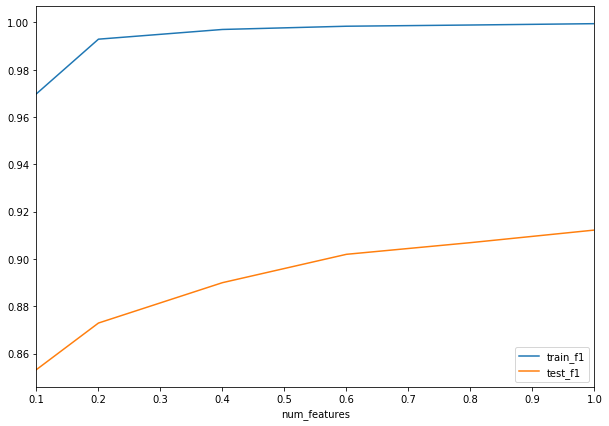

In [0]:
clf = LogisticRegression(C=100, solver='lbfgs',multi_class='ovr',max_iter=10000)
feature_num_df = feature_num(clf, array_B, df['target'])
feature_num_df.plot(x="num_features", y=["train_f1", "test_f1"],figsize=(10,7))
plt.show()

## 3.5 Best Models on Different Feature Sets

### <center><span style="color:Green">Summary

Features used in Section 3.4 include titles, authors and urls together, I combined these three features into a single column called 'preprocessed'.

In this section, I will change the features and implement them on the best models from above sections:

- title_cleaned features only
- All features (include time and score for each post)

#### Comparisons of Different Feature Sets


|Features|Algorithms|author, url and title|title Only|time, score, author, url and title|
|---|---|---|---|---|
|Binary|Logistic Regression|91.49%|77.34%|91.87%|
|Word Frequency|Support Vector Machine|90.58%|78.43%|89.70%|
|TF-IDF|Support Vector Machine|91.23%|78.98%|90.57%|

### <center><span style="color:Green">Discussion

&emsp;&emsp;&emsp;As we can see from the results, if only contents in titles were used as features, the F1 scores for training set were similar but got worse by about 15% in the test set. The reason behind was the number of features decreased by almost half without keywords from urls and authors, take binary features as an example, number of features changed from 41581 to 22412, therefore, the model may not capture enough patterns in the training set as authors and urls all provided very useful information for classfications, decreased the number of features may not help the F1 score get the best results.


&emsp;&emsp;&emsp;Adding time and score for each posting did not worsen or improve the F1 score in the test set very much, the result were getting worse by only by most 2 percent for word frequeny and TF-IDF features but increased a bit for binary features. As we can see from the shape of the features, only 2 columns of time and score were added to the original features to get a total number of features of 41583 for binary features. Therefore, the features may not have significant impact on the performance of the models since they have already got significant information or patterns from the original features (url+title+author).

### 3.5.1 title_cleaned feature only

#### 3.5.1.1 Binary

In [0]:
word_counter = Counter()
for i in list(finaldf.index):
    line = finaldf.title_cleaned[i]
    word_counter.update(line)
    
word_list = [word for word in dict(word_counter).keys()]

df_only = []
for i in list(finaldf.index):
    line = finaldf.title_cleaned[i]
    df_only.append([1 if word in line else 0 for word in word_list])

df_allB = pd.DataFrame(df_only, columns=word_list)
df_allB.index = finaldf.index

In [0]:
array_onlyB = sp.sparse.csr_matrix(df_allB.values)

print('Original Array Shape:', array_B.shape)
print('All Features Array Shape:', array_onlyB.shape)
print('\n')

#Split into train and test dataset
Xo_train, Xo_test, yo_train, yo_test = train_test_split(array_onlyB, finaldf['target'],test_size=0.3, stratify=finaldf['target'])

#best model in binary features
clf = LogisticRegression(C=100, solver='lbfgs',multi_class='ovr',max_iter=10000)
clf.fit(Xo_train, yo_train)

train_pred = clf.predict(Xo_train)
train_acc = f1_score(yo_train, train_pred,average='macro')

test_pred = clf.predict(Xo_test)
test_acc = f1_score(yo_test, test_pred,average='macro')    

print("Model: Support Vector Machine with Binary Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Original Array Shape: (21002, 41581)
All Features Array Shape: (21002, 22412)


Model: Support Vector Machine with Binary Features
F1 Score for Training: 99.64%
F1 Score for Test: 77.34%


#### 3.5.1.2 Word Frequency

In [0]:
# Bag of Words model
# Only transforming sentiment_tweets data here
vec_bw = CountVectorizer(stop_words='english')
array_onlyWF = vec_bw.fit_transform(finaldf['title_cleaned'].apply(' '.join))

print('Original Array Shape:', array_WF.shape)
print('All Features Array Shape:', array_onlyWF.shape)
print('\n')

#Split into train and test dataset
Xo_train, Xo_test, yo_train, yo_test = train_test_split(array_onlyWF, finaldf['target'],test_size=0.3,stratify=finaldf['target'])

#best model for word frequency features
clf = svm.LinearSVC(C=0.1, multi_class='ovr')
clf.fit(Xo_train, yo_train)

train_pred = clf.predict(Xo_train)
train_acc = f1_score(yo_train, train_pred,average='macro')

test_pred = clf.predict(Xo_test)
test_acc = f1_score(yo_test, test_pred,average='macro')   

print("Model: Logistic Regression with Word Frequency Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Original Array Shape: (21002, 41294)
All Features Array Shape: (21002, 22152)


Model: Logistic Regression with Word Frequency Features
F1 Score for Training: 94.93%
F1 Score for Test: 78.43%


#### 3.5.1.3 TF-IDF

In [0]:
vec_tfidf = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None,stop_words='english')
array_onlyTFIDF = vec_tfidf.fit_transform(finaldf['title_cleaned'].apply(' '.join))

print('Original Array Shape:', array_TFIDF.shape)
print('All Features Array Shape:', array_onlyTFIDF.shape)
print('\n')

# Split into train and test dataset
Xo_train, Xo_test, yo_train, yo_test = train_test_split(array_onlyTFIDF, finaldf['target'],test_size=0.3,stratify=finaldf['target'])


#best model for TF-IDF features
clf = svm.LinearSVC(C=0.01, multi_class='ovr')
clf.fit(Xo_train, yo_train)

train_pred = clf.predict(Xo_train)
train_acc = f1_score(yo_train, train_pred,average='macro')

test_pred = clf.predict(Xo_test)
test_acc = f1_score(yo_test, test_pred, average='macro')   

print("Model: Logistic Regression with TF-IDF Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Original Array Shape: (21002, 41294)
All Features Array Shape: (21002, 22152)


Model: Logistic Regression with TF-IDF Features
F1 Score for Training: 98.54%
F1 Score for Test: 78.98%


### 3.5.2 Include 'time' and 'score' all together

In [0]:
col_add = finaldf[['time','score']].values

#### 3.5.2.1 Binary

In [0]:
#binary features
all_B = np.hstack((col_add,array_B.toarray()))

array_all = sp.sparse.csr_matrix(all_B)

print('Original Array Shape:', array_B.shape)
print('All Features Array Shape:', array_all.shape)
print('\n')

#Split into train and test dataset
Xall_train, Xall_test, yall_train, yall_test = train_test_split(array_all, finaldf['target'],test_size=0.3, stratify=finaldf['target'])


#best model in binary features
clf = LogisticRegression(C=100, solver='lbfgs',multi_class='ovr',max_iter=10000)
clf.fit(Xall_train, yall_train)

train_pred = clf.predict(Xall_train)
train_acc = f1_score(yall_train, train_pred,average='macro')

test_pred = clf.predict(Xall_test)
test_acc = f1_score(yall_test, test_pred,average='macro')    

print("Model: Support Vector Machine with Binary Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Original Array Shape: (21002, 41581)
All Features Array Shape: (21002, 41583)


Model: Support Vector Machine with Binary Features
F1 Score for Training: 99.95%
F1 Score for Test: 91.87%


#### 3.5.2.2 Word Frequency

In [0]:
#word frequency features
all_WF = np.hstack((col_add,array_WF.toarray()))

array_all = sp.sparse.csr_matrix(all_WF)

print('Original Array Shape:', array_WF.shape)
print('All Features Array Shape:', array_all.shape)
print('\n')

Xall_train, Xall_test, yall_train, yall_test = train_test_split(array_all, finaldf['target'],test_size=0.3, stratify=finaldf['target'])

clf = svm.LinearSVC(C=0.1, multi_class='ovr')
clf.fit(Xall_train, yall_train)

train_pred = clf.predict(Xall_train)
train_acc = f1_score(yall_train, train_pred,average='macro')

test_pred = clf.predict(Xall_test)
test_acc = f1_score(yall_test, test_pred,average='macro')   

print("Model: Logistic Regression with Word Frequency Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Original Array Shape: (21002, 41294)
All Features Array Shape: (21002, 41296)


Model: Logistic Regression with Word Frequency Features
F1 Score for Training: 98.47%
F1 Score for Test: 89.7%


#### 3.5.2.3 TF-IDF

In [0]:
all_TFIDF = np.hstack((col_add,array_TFIDF.toarray()))

array_all = sp.sparse.csr_matrix(all_TFIDF)

print('Original Array Shape:', array_TFIDF.shape)
print('All Features Array Shape:', array_all.shape)
print('\n')

Xall_train, Xall_test, yall_train, yall_test = train_test_split(array_all, finaldf['target'],test_size=0.3, stratify=finaldf['target'])

clf = svm.LinearSVC(C=0.01, multi_class='ovr')
clf.fit(Xall_train, yall_train)

train_pred = clf.predict(Xall_train)
train_acc = f1_score(yall_train, train_pred,average='macro')

test_pred = clf.predict(Xall_test)
test_acc = f1_score(yall_test, test_pred, average='macro')   

print("Model: Logistic Regression with TF-IDF Features")
print("F1 Score for Training: {}%".format(round(train_acc*100,2)))
print("F1 Score for Test: {}%".format(round(test_acc*100,2)))

Original Array Shape: (21002, 41294)
All Features Array Shape: (21002, 41296)


Model: Logistic Regression with TF-IDF Features
F1 Score for Training: 99.68%
F1 Score for Test: 90.57%


# <center>Part 4: Sentiment Analysis

## 4.1 Calculating Vader Sentiment Scores for Titles

&emsp;&emsp;&emsp;VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of a sentiment lexicon which is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative.

In [0]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [0]:
reddits = data['title'].values
redditDF = evalSentences(reddits, to_df=True, columns=['title','vader'])

100%|██████████| 21002/21002 [00:04<00:00, 4262.87it/s]


In [0]:
data.index = list(range(len(data)))

In [0]:
data_with_vader = data.copy()
data_with_vader['vader'] = redditDF['vader']
data_with_vader = data_with_vader[['title','subreddit','vader']]
data_with_vader

,title,subreddit,vader
0,I’ve seen several movies/shows over the past f...,movies,0.1431
1,bots are taking over,technology,0.0000
2,“Let’s just say every last molecule of you at ...,technology,0.0000
3,Name a movie that you LIKE but everyone else L...,movies,0.8506
4,Louis C.K. mocks Parkland students in audio of...,news,-0.4588
...,...,...,...
20997,Is 100% renewable energy for the US possible? Yes,technology,0.5859
20998,President Trump signs Goodlatte Music Moderniz...,news,0.4939
20999,UPS said robots will help sort almost 80% of i...,technology,0.4019
21000,An autofilled teammate feels 10x worse than it...,leagueoflegends,-0.4767


## 4.2 Define a threshold by Distributions

&emsp;&emsp;&emsp;As shown from the distribution plot of vader scores for all four topics, we can clearly see there are three peaks. First one is at 0 which shows that 0 occupied the majority of the scores, this may be because vader sentiment analysis can not give any score to those titles with no emotions in them. Other two peaks, for positive scores, the peak is around 0.4 and it's around -0.35 for negative scores.


&emsp;&emsp;&emsp;To furtherly make sure the threshold is chosen properly for every topic, I plotted the distributions for all topics to see whether any topic does not have similar distributions as others. The four distribution plots for every topic shows that they all have their peaks around +0.4 and -0.4 for positive and negative vader scores, respectively. This may indicate that the scores for all topics may distribute similarly and the thresholds may separate those clearly positive and clearly negative sentiments reasonably.

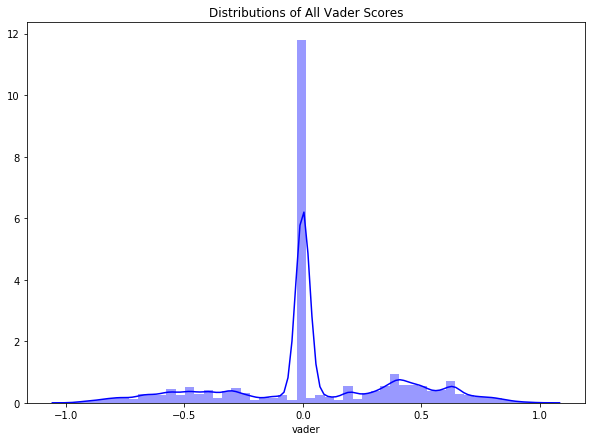

In [0]:
#plot for entire scores
plt.figure(figsize=(10,7))
sns.distplot(data_with_vader['vader'],color='b')
plt.title('Distributions of All Vader Scores')
plt.show()

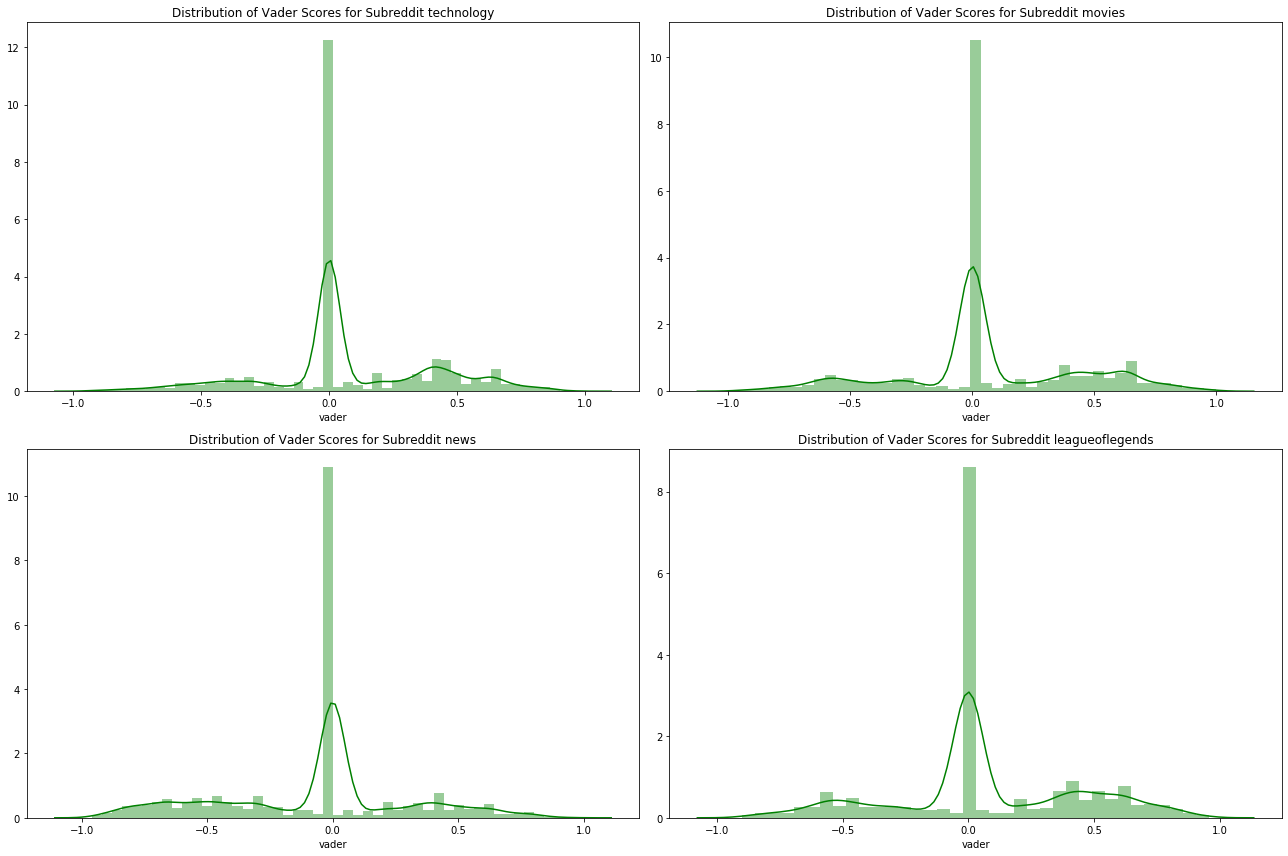

In [0]:
#plot for each topic
plt.figure(figsize=(18,12))

for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    df_temp = data_with_vader[data_with_vader['subreddit']==topic]
    plt.subplot(2,2,i+1)
    sns.distplot(df_temp['vader'],color='g')
    plt.title('Distribution of Vader Scores for Subreddit '+ topic)
plt.tight_layout()
plt.show()

## 4.3 Assign Sentiment Labels and Distribution of Sentiments

&emsp;&emsp;&emsp;The threshold is set to 0.4 and -0.4 for clearly positive and clearly negative posts and sentiment labels are assigned to each of the post. Posts with vader score between the thresholds are dropped and final dataframe created for sentiment analysis is called 'df_sentiment'.


&emsp;&emsp;&emsp;The distributions of positive and negative sentiments are shown separately below for each topic, as we can see from the bar plots: the number of positive sentiments in each topic has doubled the number of negative sentiments. The reason behind this could be users will not always say all bad words about a topic, although they may have negative sentiment, the posts may still include some positive words. Therefore, vader analysis may giave this kind of comments relatively more positive scores and make the distribution more imbalanced. For topics 'movies' and 'leagueoflegneds', they have relatively smaller datasets compared to other two, this lack of data may lead to a problem which some positive and negative words may be mixed up together and will not provide a very meaningful results.

In [0]:
def assign_sentiment(df_sentiment, threshold_pos, threshold_neg):
    
    for i in range(len(df_sentiment)):
    
        score = df_sentiment.loc[i,'vader']
    
        if score <= threshold_pos and score >= threshold_neg:
        
            df_sentiment.drop([i],inplace=True)
    
        elif score > threshold_pos:
        
            df_sentiment.loc[i,'sentiment'] = 'positive'
        
        elif score < threshold_neg:
        
            df_sentiment.loc[i,'sentiment'] = 'negative'
    
    df_sentiment.index = list(range(len(df_sentiment)))

    return df_sentiment

In [0]:
df_sentiment = data_with_vader.copy()
df_sentiment['sentiment'] = ''
df_sentiment = assign_sentiment(df_sentiment, 0.4, -0.4)
df_sentiment.columns = ['title_original', 'subreddit', 'vader', 'sentiment']
df_sentiment.head()

,title_original,subreddit,vader,sentiment
0,Name a movie that you LIKE but everyone else L...,movies,0.8506,positive
1,Louis C.K. mocks Parkland students in audio of...,news,-0.4588,negative
2,I edited together a roundup video of some of t...,movies,0.6360,positive
3,(Old news that hasnt been discussed​ )The the ...,movies,0.4019,positive
4,U.S. Navy pursuing block buy of two aircraft c...,news,-0.4404,negative


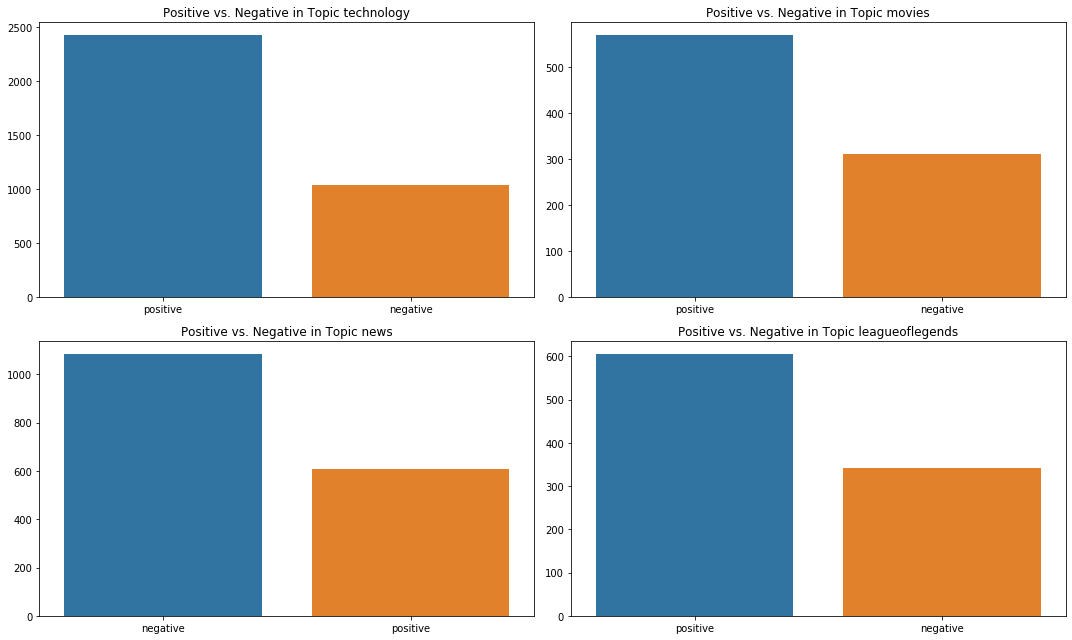

In [0]:
plt.figure(figsize=(15,9))
for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    
    df_topic = df_sentiment[df_sentiment.subreddit==topic]
    
    c = df_topic.sentiment.value_counts()
    
    plt.subplot(2,2,i+1)
    
    sns.barplot(x=c.index, y=c.values)
    plt.title('Positive vs. Negative in Topic '+topic)

plt.tight_layout()
plt.show()

## 4.4 Top  Words by Word Frequency

### <center><span style="color:Green">Summary


&emsp;&emsp;&emsp;I used word frequency to get the top common words from positive and negative titles for each topic and plot them in the word clouds as shown below, they did show some subreddit-specific patterns.

- technology: some words like 'technology', 'mobile', 'router', 'phone', 'huawei', 'facebook' and 'google' are words that indicate the contents in this topic, we can clearly say these titles belong to technology field. Some words related to sentiments such as 'good', 'best', 'die' also shown as well but not very frequently;

- movies: some words like 'movie', 'film', 'oscar', 'scene', 'award', 'director', 'watch', 'trailer', 'netflix' showed susbreddit-specific patterns and some sentiment words such as 'good', 'best', 'favourite', 'love', 'please', 'super', 'bad', 'worst', 'hate' appeared much more frequently than topic 'technology', the reason could be there are more postings related to reviews to movies or trailers which will include more people's emotions;

- 'news': words like 'world', 'trump', 'police', 'court', 'people', 'death', 'shooting', 'killing', 'crime' are some words highly related to topic 'news' which are likely to be reported everyday on TV shows. Not so many words related to sentiments showed up, the only ones I can find out are 'good' and 'love'. The reason for lack of these words in topic 'news' could be news is a statement of fact which may not contain so many words express people's emotions;

- 'leagureoflegends': words like 'champion', 'lol', 'game', 'support', 'team', 'riot' indicated the contents under this topic since these are words people always used in this game, some sentiments words 'good', 'best', 'love', 'better', 'bad' appeared fairly frequently in this topic since people may discussed the new heroes, game modes, skins and the pro-teams in their postings.


&emsp;&emsp;&emsp;It is worth to mention that, topic 'movie' has very similar numbers of sentiments words in positive and negative postings, however, other three topics have more positive sentiments than negative ones, this may be due to both the imbalance of the original dataset and the nature of the topics. 'movies' tend to have postings highly related to reviews as mentioned above so that many sentiments words will be generated, 'technology' may also have reviews on new products but it is not the case in this dataset, 'news' is more likely to be a statement of fact which does not include any judgements and emotions, and finally 'leagueoflegends' tends to have very few sentiments words in the postings.


&emsp;&emsp;&emsp;In summary, word frequency can only give the most common words appeared in the sentiments and may not give us too much useful information about which words can express the sentiments more strongly or weakly, or simply it does not give much information about association between word and its given classes. In other words, we do not know which words have strong correlations with the positive or negative sentiments, therefore, PMI was used in the following section.

In [0]:
def plot_sentiment(pos, neg, topic):
    
    plt.figure(figsize=(12,4))
    
    x_pos,y_pos = map(list,zip(*pos))
    string_pos = (' ').join(x_pos)
    plt.subplot(1,2,1)
    wordcloud = WordCloud(background_color="white",width=1000, height=800,max_font_size=200,collocations=False).generate(string_pos)
    plt.imshow(wordcloud)
    plt.title('Common Words of Positive Sentiment in Topic '+topic)
    plt.axis('off')
    
    x_neg,y_neg = map(list,zip(*neg))
    string_neg = (' ').join(x_neg)
    plt.subplot(1,2,2)
    wordcloud = WordCloud(background_color="white",width=1000, height=800,max_font_size=200,collocations=False).generate(string_neg)
    plt.imshow(wordcloud)
    plt.title('Common Words of Negative Sentiment in Topic '+topic)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [0]:
#define function can find top k keywords in specified column
def topk_sentiment(df, topic, k):
    
    lemmatizer = WordNetLemmatizer()
    stops = set(stopwords.words('english'))
    df_topic = df[df.subreddit==topic]
    
    df_pos = df_topic[df_topic.sentiment == 'positive']
    df_neg = df_topic[df_topic.sentiment == 'negative']
    
    #postive
    lines_pos = df_pos['title_original'].values
    c_pos = Counter()
    for line_pos in lines_pos:
        c_pos.update([lemmatizer.lemmatize(word.lower()) for word in re.findall(r'\w+', line_pos) if word.lower() not in stops and len(word) > 2])
    topk_pos = c_pos.most_common(k)
    
    
    #negative
    lines_neg = df_neg['title_original'].values
    c_neg = Counter()
    for line_neg in lines_neg:
        c_neg.update([lemmatizer.lemmatize(word.lower()) for word in re.findall(r'\w+', line_neg) if word.lower() not in stops and len(word) > 2])
    topk_neg = c_neg.most_common(k)    
    
    plot_sentiment(topk_pos, topk_neg, topic)
    
    return topk_pos, topk_neg

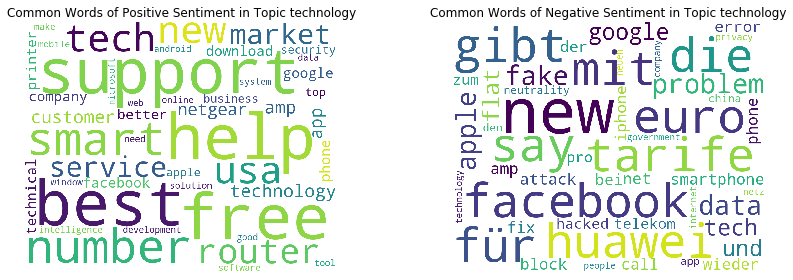

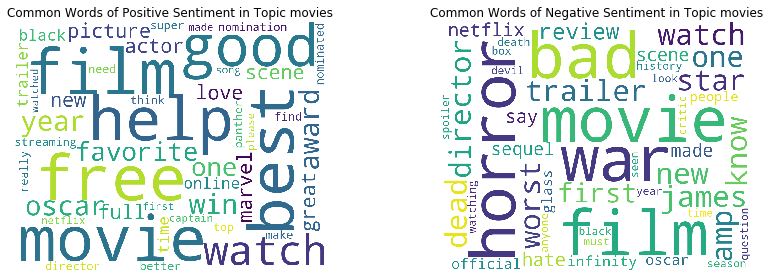

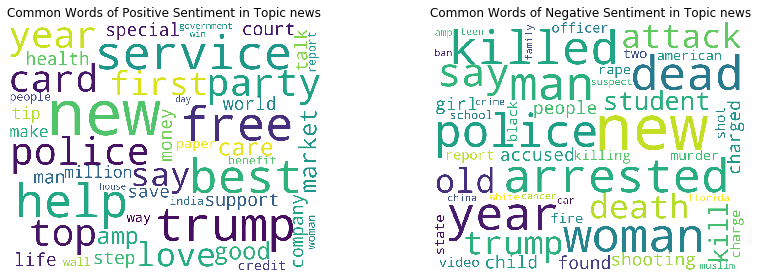

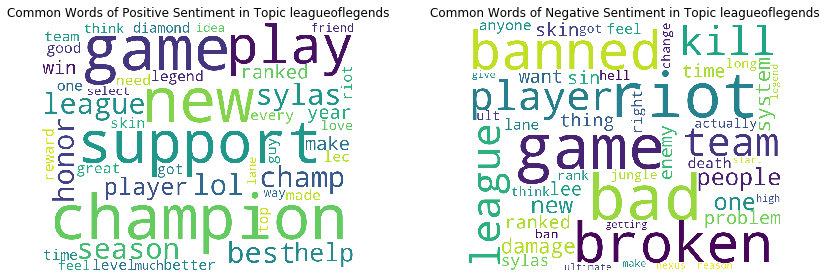

In [0]:
for i in range(len(my_subreddits)):
    
    pos, neg = topk_sentiment(df_sentiment, my_subreddits[i], 50)

## 4.5 Pointwise Mutual Information on Sentiments

### 4.5.1 Justification

As discussed above, word frequency in the positive and negative postings only shows the most common words but ignore the correlations between words and sentiments. However, PMI could give us information about how much more do events x and y co-occur than if they were independent, We can compute the PMI as the difference of association each word with positive sentiment and negative sentiment. The computed PMI value can be used as the weights for the words in the vector space model instead of the weights given by TF-IDF, WF and binary weighting methods. Further, vector space model can be built with the given PMI values and machine learning models could be built according to the PMI to get a more accurate result.

### 4.5.2 Single Words PMI

### <center><span style="color:Green">Summary

From the results of single words with sorted PMI below:


- 'technology': very few words related to sentiments are returned such as 'good' and 'better', more words related to subreddit-specific patterns are returned such as 'samsung', 'microsoft', 'google' and 'telekom' these are some popular contents people love to discuss under the topic 'technology' and therefore they appear very frequently in PMI since they are being discussed in both positive and negative postings and being regarded as very informative to both the sentiments. It is worth to mention that samsung got a relatively very high score 0.425 in the negative sentiment which means it has fairly high correlation with negative sentiments and this may be due to the news of mobile phone explosion last year and people got mostly nagative comments on it; 


- 'movies': not a lot of words have postive values in this subreddit which means they co-occur less frequently than they would be expected. It seems like some movies related to heroes got quite a few positive postings such as 'infinity war' and 'black panther' which were two movies very trendy in January last year;


- 'news': all the PMIs for negative sentiments are negative which means no single words are informative about the people's sentiments, and some words such as 'market', 'girl', 'racist' and 'bank' could be the prevalent topics at that time. As we discused before, news is more likely to be a statement of facts and people may not be very emotional about it, therefore, not so many words are related to sentiments for this subreddit;


- 'leagueoflegends': same situation as 'news' appeared in this subreddit too, not many words related to sentiments showed up here, i.e. most of the words got negative scores in both sentiment. 'great', 'happy' and 'love' appeared but also with negative scores, which means they appeare less frequently with sentiments than expected.


&emsp;&emsp;&emsp;The reason behind many negative PMIs in 'movies','news' and 'leagueoflegends' could be **lack of datas**, as shown in the distribution of positive and negative sentiments in each subreddit, these three subreddits had the least number of data compared to 'technology'. This could be a problem since there are not so many single words very informative and appeared very relevant to sentiments. 


&emsp;&emsp;&emsp;Then, I tried to use Noun-Phrases to see whether there are more information correlated to sentiments in each subreddit.

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['sentiment']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['sentiment']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [0]:
def pmiIndivCal(df,x,gt, label_column='sentiment'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [0]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk, label_column='sentiment'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist. append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pd.DataFrame(pmilist)
    pmiposlist = pd.DataFrame(pmiposlist)
    pmineglist = pd.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [0]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(df, k):
    
    titles = df['title_original'].values
    
    stop = set(stopwords.words('english'))
    stop.add('https')
    stop.add('http')
    stop.add('html')
    stop.add('htmls')
    stop.add('amp')
    stop.add('amps')
    stop.add('The')
    stop.add('www')
    stop.add('com')
    stop.add('reddit')
    stop.add('comments')
    stop.add('jpg')
    stop.add('png')
    stop.add('org')
    
    # Top-k frequent terms
    counter = Counter()
    for title in titles:

        #remove numbers
        title = re.sub('\d','',title)
        
        counter.update([lemmatizer.lemmatize(word.lower()) 
                        for word 
                        in re.findall(r'\w+', title) 
                        if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqTitle = []
    for i in range(len(titles)):
        tempCounter = Counter([lemmatizer.lemmatize(word.lower()) for word in re.findall(r'\w+',titles[i])])
        topkinTitle = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqTitle.append(topkinTitle)
        
    #Prepare freqReviewDf
    freqTitleDf = pd.DataFrame(freqTitle)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqTitleDf.columns = dfName

    finaldf = pd.concat([df,freqTitleDf],axis=1)
    
    return topk, finaldf

In [0]:
def get_word_senti(df, topic):
    
    df_senti = df[df.subreddit==topic]
    
    topk, finaldf = dataFrameTransformation(df_senti,150)
    pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf,topk)
    
    pmiposlist_topk = pmiposlist.sort_values('pmi',ascending=False).head(20)
    pmineglist_topk = pmineglist.sort_values('pmi',ascending=False).head(20)
    
    
    return pmiposlist_topk, pmineglist_topk

In [0]:
pos, neg = [], []

for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    
    pos_topic, neg_topic = get_word_senti(df_sentiment, topic)
    
    pos_topic = pos_topic.reset_index(drop=True)
    neg_topic = neg_topic.reset_index(drop=True)
    
    pos.append(pos_topic)
    neg.append(neg_topic)

100%|██████████| 150/150 [00:01<00:00, 78.40it/s]


In [0]:
index = np.array([['positive','positive','negative','negative'], ['word', 'pmi', 'word', 'pmi']])
multidx = pd.MultiIndex.from_arrays(index)

In [0]:
print('technology')
tech_word = pd.concat([pos[0],neg[0]],axis=1)
tech_word.columns = multidx
display(tech_word)

technology


positive                negative          
           word       pmi          word       pmi
0        report  0.206943       samsung  0.425034
1        wieder  0.190942  intelligence  0.260104
2          must  0.093779    artificial  0.229864
3          good  0.074218          flat  0.208811
4         court  0.057411        mobile  0.193306
5          arlo  0.057411         first  0.173719
6     marketing  0.057411         smart  0.098996
7        people  0.030012           pro  0.078757
8           win  0.026639          news  0.072678
9    technology  0.017406           say  0.054660
10  development -0.003214         honor  0.054660
11   government -0.007128       telekom  0.036960
12        right -0.007128       website  0.036960
13       better -0.011582     microsoft  0.032920
14       social -0.016697           bei  0.026489
15       please -0.033561          save  0.019569
16         euro -0.042673          apps  0.004016
17      feature -0.044372        google  0.001796
18      youtube -0.051788           net -0.014333
19        trump -0.051788      industry -0.014333

In [0]:
print('movies')
movie_word = pd.concat([pos[1],neg[1]],axis=1)
movie_word.columns = multidx
display(movie_word)

movies


positive             negative          
        word       pmi       word       pmi
0       real  0.470712    thought  0.054610
1       hero  0.077670    spoiler -0.127711
2    actress -0.040113   original -0.281862
3      first -0.131085      found -0.281862
4    picture -0.131085   download -0.415393
5        old -0.145474  nollywood -0.415393
6   original -0.194264       bird -0.415393
7     poster -0.240784      scene -0.533176
8        win -0.263257     latest -0.533176
9   infinity -0.327795   greatest -0.533176
10     death -0.327795     really -0.533176
11    making -0.327795    finally -0.533176
12  rhapsody -0.327795       many -0.533176
13    better -0.407838     cinema -0.533176
14      long -0.445578       song -0.533176
15  bohemian -0.445578       come -0.533176
16   panther -0.445578  streaming -0.587244
17      back -0.445578       else -0.638537
18     think -0.499645       help -0.638537
19     globe -0.550939       life -0.733847

In [0]:
print('news')
news_word = pd.concat([pos[2],neg[2]],axis=1)
news_word.columns = multidx
display(news_word)

news


positive           negative          
        word       pmi     word       pmi
0    special  0.705272  assault -0.027117
1     online  0.327978     many -0.038952
2     market  0.245740   health -0.096110
3       girl  0.194446     care -0.150177
4     family  0.153624     back -0.176153
5       bank  0.133822      see -0.176153
6      story  0.114404   crisis -0.176153
7     racist  0.076663     york -0.176153
8        way  0.022596     face -0.221273
9         dy  0.022596  million -0.229641
10     birth -0.028697     fire -0.250261
11      fire -0.077487     wife -0.250261
12      baby -0.093236   sexual -0.250261
13      fake -0.093236   medium -0.250261
14  business -0.093236     rape -0.250261
15      game -0.153860    money -0.250261
16   russian -0.153860     case -0.278432
17     crime -0.153860     kill -0.305831
18   killing -0.177117      two -0.309684
19      card -0.211019   mother -0.319254

In [0]:
print('leagueoflegends')
lol_word = pd.concat([pos[3],neg[3]],axis=1)
lol_word.columns = multidx
display(lol_word)

leagueoflegends


positive           negative          
       word       pmi     word       pmi
0       guy -0.120908      ult  0.046973
1      kill -0.169698    still -0.215391
2     great -0.169698     rune -0.289499
3     happy -0.169698   pretty -0.289499
4   diamond -0.216218   rework -0.289499
5      love -0.303229    blitz -0.289499
6    jungle -0.303229   change -0.358492
7   playing -0.303229    nexus -0.423031
8     think -0.421012   broken -0.483655
9      hope -0.421012     free -0.540814
10      urf -0.526373  already -0.540814
11     look -0.526373     high -0.646174
12     main -0.526373   irelia -0.646174
13      lcs -0.526373   always -0.646174
14    video -0.526373   ranked -0.678964
15      mid -0.526373     play -0.694964
16   irelia -0.526373    match -0.741484
17     rank -0.590911   select -0.741484
18     need -0.621683  diamond -0.741484
19   friend -0.621683     made -0.741484

### 4.5.3 Noun Phrases PMI

Noun Phrases gave me more information about the content most related to sentiments:

- 'technology': some phrases like 'witness huge growth', 'easy step', 'better resource', 'fake news' had strong correlation with sentiments and they got very high positive PMIs. Some contents such as 'smartphone tariff', 'steve job', 'elon musk', 'marker zuckerberg' all have very high PMIs with positive sentiments which mean people tend to have very positive comments on them; on the other hand, 'new app', 'best web design company', 'google assistant' all have relatively high scores related to negative sentiments which means people may often gave bad comments on these topics;


- 'news': we can get a lot of useful information from each sentiment include some patterns in this subreddit: some hot topics last year has appeared such as 'bangkok airport', 'saudi woman', 'ohio man', 'marine barrack', 'government shutdown' and 'sexual assault' all had strong relationships with either positive or negative sentiments. However, some good or bad adjetives still does not appear, this may due to the nature of this subreddit and lack of data as well;


- 'movies': similar to single words, noun phrases still have more negative scores. However, more useful and informative topics had shown up such as 'marvel movie', 'infinity war', 'assasination nation' all got very high PMIs related to positive sentiment which they may get very frequent positive postings; phrases like 'swedish film festival', 'escape room', 'bird box' all got relatively strong correlation with negative sentiment which means people may think they are not good in most of postings;


- 'leagueoflegends': More informative phrases has shown up such as 'sylas ult interaction', 'lol champion', 'decent lee sin kick', 'triple kill' all tend to have positive sentiments in the postings, 'bot game' , 'nexus blitz' and some phrases appeared in positive sentiments had also shown up in negative postings.


&emsp;&emsp;&emsp;In conclusion, by using PMIs on both single words and noun phrases could give us more subreddit-related patterns, we can easily get which words or phrases are more informative and correlated to sentiments. PMI is a good metric that can tell us whether a context word is particularly informative about the target class (sentiments in this case). however, many words returned have negative values in the corresponding sentiment, this could be affected by the predefined thresholds, number of top words returned in algorithm and also lack of data. Subreddits 'movies' and 'leagueoflegends' have the least number of data which are both less than 1000, the postings may not provide a comprehensive understanding of the sentiments.

In [0]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(df, k):
    
    titles = df['title_original'].values
    
    # Top-k frequent terms
    counter = Counter()
    for title in titles:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', title)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqTitle = []
    for i in range(len(titles)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',titles[i]))))]))
        topkinTitle = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqTitle.append(topkinTitle)
        
        
    #Prepare freqReviewDf
    freqTitleDf = pd.DataFrame(freqTitle)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqTitleDf.columns = dfName
    
    finaldf = pd.concat([df,freqTitleDf],axis=1)
    
    return topk, finaldf

In [0]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal_noun(df,topk, label_column='sentiment'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist. append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pd.DataFrame(pmilist)
    pmiposlist = pd.DataFrame(pmiposlist)
    pmineglist = pd.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [0]:
def get_np_senti(df, topic):
    
    df_senti = df[df.subreddit==topic]
    
    topk, finaldf = newDataFrameTransformation(df_senti, 50)
    pmiposlist_noun, pmineglist_noun, pmidf_noun = pmiForAllCal_noun(finaldf,topk)
    
    pmiposlist_topk = pmiposlist_noun.sort_values('pmi',ascending=False).head(20)
    pmineglist_topk = pmineglist_noun.sort_values('pmi',ascending=False).head(20)

    return pmiposlist_topk, pmineglist_topk

In [0]:
pos_np, neg_np = [], []

for i in range(len(my_subreddits)):
    
    topic = my_subreddits[i]
    
    pos_topic, neg_topic = get_np_senti(df_sentiment, topic)
    
    pos_topic = pos_topic.reset_index(drop=True)
    neg_topic = neg_topic.reset_index(drop=True)
    
    pos_np.append(pos_topic)
    neg_np.append(neg_topic)

100%|██████████| 50/50 [00:00<00:00, 69.30it/s]


In [0]:
print('technology')
tech_np = pd.concat([pos_np[0],neg_np[0]],axis=1)
tech_np.columns = multidx
display(tech_np)

technology


positive            \
                                                 word       pmi   
0                                       tech question  0.527415   
1                                 witness huge growth  0.527415   
2   tech weekly technology tech support general di...  0.462876   
3                                 gb smartphone tarif  0.345093   
4                                           steve job  0.239732   
5                                           easy step  0.239732   
6                                           elon musk  0.239732   
7      netgear extender support mywifiext help number  0.190942   
8                                     mark zuckerberg  0.162771   
9                                 government shutdown  0.057411   
10                                    better resource  0.057411   
11                                     cloud platform  0.057411   
12                                     small business  0.057411   
13                                         honor view  0.057411   
14                                   google assistant  0.057411   
15                               fix quickbooks error  0.057411   
16        best graphite product manufacturer supplier  0.057411   
17                                 wholesaler company  0.057411   
18                                      free download  0.057411   
19                                           euro eff -0.037899   

                               negative            
                                   word       pmi  
0                   government shutdown  0.614276  
1                               new app  0.496493  
2     netgear extender extender support  0.391132  
3               best web design company  0.342342  
4                             fake news  0.295822  
5                         security news  0.208811  
6                      google assistant  0.208811  
7                              odoo erp  0.208811  
8                          instant help  0.208811  
9                            honor view  0.208811  
10              artificial intelligence  0.167989  
11               download free tool hip  0.148186  
12  netgear router netgear router login  0.091028  
13             router net login support  0.091028  
14                      mark zuckerberg  0.091028  
15             netgear router login net  0.091028  
16                         trade secret -0.014333  
17                            steve job -0.014333  
18                          bottom line -0.014333  
19                       net neutrality -0.014333

In [0]:
print('news')
news_np = pd.concat([pos_np[2],neg_np[2]],axis=1)
news_np.columns = multidx
display(news_np)

news


positive                              negative          
               word       pmi                        word       pmi
0   bangkok airport  1.580741         government shutdown  0.714820
1       saudi woman  1.293059              sexual assault  0.597037
2     supreme court  0.887593             way credit card -0.096110
3          ohio man  0.482128                teenage girl -0.096110
4    marine barrack  0.482128                 florida man -0.096110
5     washington dc  0.482128               social medium -0.096110
6        sick puppy  0.482128     conservative news today -0.096110
7      teenage girl  0.482128                 white house -0.096110
8   way credit card  0.482128             criminal charge -0.096110
9      saudi arabia  0.482128  predator host chris hansen -0.096110
10       first time  0.482128                 health care -0.096110
11       second man  0.482128                    ohio man -0.096110
12  criminal charge  0.482128               washington dc -0.096110
13  rape allegation  0.482128              marine barrack -0.096110
14      florida man  0.482128                 marine shot -0.096110
15      marine shot  0.482128         body odor complaint -0.096110
16      border wall  0.194446                 black crime -0.250261
17   jazmine barnes  0.194446                white victim -0.250261
18         http bit  0.194446               year old girl -0.383792
19  president trump  0.194446                    http bit -0.383792

In [0]:
print('movies')
movie_np = pd.concat([pos_np[1],neg_np[1]],axis=1)
movie_np.columns = multidx
display(movie_np)

movies


positive            \
                     word       pmi   
0            marvel movie  1.058499   
1            infinity war  0.653034   
2    assassination nation  0.365352   
3               movie fan  0.365352   
4           academy award -0.040113   
5             horror film -0.040113   
6           movie history -0.040113   
7              tom cruise -0.040113   
8               come back -0.040113   
9           movie trailer -0.040113   
10      bohemian rhapsody -0.194264   
11            dark knight -0.327795   
12          black panther -0.327795   
13           best picture -0.550939   
14          favorite film -0.550939   
15              need help -0.550939   
16         favorite movie -0.733260   
17  swedish film festival -1.444368   
18                far cry -1.444368   
19             first time -1.444368   

                                          negative            
                                              word       pmi  
0                            swedish film festival  0.970901  
1                                      escape room  0.970901  
2                                    locked coffin  0.970901  
3                                        need help  0.054610  
4                                         bird box -0.127711  
5                                       full movie -0.838819  
6                                   franchise film -0.838819  
7                                          far cry -0.838819  
8                                       first time -0.838819  
9                                  superhero movie -0.838819  
10                                     mark strong -0.838819  
11                            assassination nation -0.838819  
12  aquaman director james wan call vfx oscar snub -0.838819  
13                                       movie fan -0.838819  
14                                    marvel movie -0.838819  
15                                     roger ebert -0.838819  
16                                  christian bale -0.838819  
17                                    bryan singer -0.838819  
18                               movie trivia quiz -0.838819  
19                                   movie history -1.244284

In [0]:
print('leagueoflegends')
lol_np = pd.concat([pos_np[3],neg_np[3]],axis=1)
lol_np.columns = multidx
display(lol_np)

leagueoflegends


positive                         negative          
                     word       pmi                   word       pmi
0          happy new year  1.083065               bot game  1.656411
1             lol esports  0.389918            nexus blitz  0.557799
2                bot lane  0.389918            champ shard -0.065636
3   sylas ult interaction  0.389918            ranked game -0.758783
4            lol champion  0.389918    decent lee sin kick -0.758783
5          great addition  0.389918             little bit -0.758783
6              pov stream  0.389918           global range -0.758783
7     decent lee sin kick  0.389918           burst damage -0.758783
8             triple kill  0.389918  sylas ult interaction -0.758783
9               game tell  0.389918         support ticket -0.758783
10             enemy team -0.015547     blood moon capsule -0.758783
11             new season -0.015547              team game -0.758783
12              riot game -0.303229           lol champion -0.758783
13            honor level -0.526373            triple kill -0.758783
14            champ shard -0.638982               rain man -0.758783
15           new champion -0.708694              game tell -0.758783
16                new one -1.332129               bot lane -0.758783
17            honor today -1.332129                new one -0.758783
18               bot game -1.332129            honor today -0.758783
19         mid beast show -1.332129         mid beast show -0.758783